In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

In [ ]:
from scipy import stats
import geopandas as gpd
import urllib
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.cm as cm
import sklearn

## If API

In [ ]:
from sodapy import Socrata

In [ ]:
data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='h9gi-nx95'    # The data set at the API endpoint (311 data in this case)
app_token='nEFd0apIUuyjJVKJgO4hHMVOK'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 600
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=1878124)
# Convert the list of dictionaries to a Pandas data frame
df = pd.DataFrame.from_records(results)

In [ ]:
# Save the data frame to a CSV file
df.to_csv("Motor_Vehicle_Collisions_Crashes.csv")

In [ ]:
df.shape

(1878124, 29)

In [ ]:
df.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5'],
      dtype='object')

## Not API

In [ ]:
df1=pd.read_csv('Motor_Vehicle_Collisions_Crashes.csv')

In [ ]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [ ]:
df1.shape

(1878124, 29)

In [ ]:
df1.drop_duplicates(subset=['collision_id'],inplace=True)
df1.dropna(subset=['collision_id', 'crash_date', 'crash_time'],inplace=True)

In [ ]:
df1['crash_date'] = pd.to_datetime(df1['crash_date'])
df1['crash_time'] = pd.to_datetime(df1['crash_time'])

In [ ]:
df1['Date'] = df1['crash_date'].dt.date
df1['Month'] = df1['crash_date'].dt.month
df1['Year'] = df1['crash_date'].dt.year
df1['DOW'] = df1['crash_date'].dt.dayofweek
df1['Hour'] = df1['crash_time'].dt.hour

In [ ]:
df1['day'] = df1['crash_date'].dt.dayofyear

In [ ]:
df1.head()

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,Date,Month,Year,DOW,Hour,day
0,2021-04-14,2022-04-20 05:32:00,BRONX WHITESTONE BRIDGE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-14,4,2021,2,5,104
1,2021-04-13,2022-04-20 21:35:00,NaN,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-13,4,2021,1,21,103
2,2021-04-15,2022-04-20 16:15:00,HUTCHINSON RIVER PARKWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-15,4,2021,3,16,105
3,2021-04-13,2022-04-20 16:00:00,VANDERVORT AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-13,4,2021,1,16,103
4,2021-04-12,2022-04-20 08:25:00,EDSON AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2021-04-12,4,2021,0,8,102


In [ ]:
df1['number_of_persons_injured'] = df1['number_of_persons_injured'].fillna(0)
df1['number_of_persons_killed'] = df1['number_of_persons_killed'].fillna(0)
df1['number_of_pedestrians_injured'] = df1['number_of_pedestrians_injured'].fillna(0)
df1['number_of_pedestrians_killed'] = df1['number_of_pedestrians_killed'].fillna(0)
df1['number_of_cyclist_injured'] = df1['number_of_cyclist_injured'].fillna(0)
df1['number_of_cyclist_killed'] = df1['number_of_cyclist_killed'].fillna(0)
df1['number_of_motorist_injured'] = df1['number_of_motorist_injured'].fillna(0)
df1['number_of_motorist_killed'] = df1['number_of_motorist_killed'].fillna(0)

### 把无zipcode信息row也删掉的数据集

In [ ]:
df_drop_empty_zipcode = df1.copy()

In [ ]:
df_drop_empty_zipcode.dropna(subset=['zip_code'],inplace=True)

In [ ]:
df_drop_empty_zipcode.shape

(1295906, 35)

### 筛年份

In [ ]:
df1_2018_2020 = df1.loc[df1['Year'].isin([2018,2019,2020])]

In [ ]:
df1_2018_2020.head(100)

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,Date,Month,Year,DOW,Hour,day
13,2019-05-21,2022-04-20 22:50:00,GOLD STREET,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2019-05-21,5,2019,1,22,141
14,2020-01-21,2022-04-20 15:49:00,BRUCKNER BLVD,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-01-21,1,2020,1,15,21
40,2020-12-31,2022-04-20 16:30:00,BELT PARKWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-12-31,12,2020,3,16,366
93,2020-12-25,2022-04-20 20:19:00,BRONX WHITESTONE BRIDGE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-12-25,12,2020,4,20,360
422,2020-04-15,2022-04-20 15:20:00,GOWANUS EXPY (BQE),0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-04-15,4,2020,2,15,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16116,2020-12-08,2022-04-20 09:13:00,DITMARS BOULEVARD,0.0,1.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-12-08,12,2020,1,9,343
16119,2020-08-01,2022-04-20 17:16:00,METROPOLITAN AVENUE,0.0,1.0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,2020-08-01,8,2020,5,17,214
16245,2020-06-04,2022-04-20 07:30:00,NaN,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-06-04,6,2020,3,7,156
16302,2020-12-14,2022-04-20 15:16:00,92 STREET,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2020-12-14,12,2020,0,15,349


In [ ]:
df_drop_empty_zipcode_2018_2020 = df_drop_empty_zipcode.loc[df1['Year'].isin([2018,2019,2020])]

In [ ]:
df_drop_empty_zipcode_2018_2020.shape

(359840, 35)

### Time Distribution (collision number)

#### hourly

In [ ]:
df1_Hourly = df1_2018_2020.groupby(['Hour']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Hourly = df1_Hourly.sort_values(by='Hour')

df1_Hourly['persons_injured_or_killed'] = df1_Hourly['number_of_persons_injured'] + df1_Hourly['number_of_persons_killed']
df1_Hourly['injured_or_killed_rate'] = df1_Hourly['persons_injured_or_killed'] / df1_Hourly['collision_count']
df1_Hourly['killed_rate'] = df1_Hourly['number_of_persons_killed'] / df1_Hourly['collision_count']
df1_Hourly.set_index('Hour',inplace = True)
df1_Hourly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Hour,,,,,,
0,20133,6990.0,46.0,7036.0,0.349476,0.002285
1,9216,3300.0,31.0,3331.0,0.361437,0.003364
2,6833,2597.0,17.0,2614.0,0.382555,0.002488
3,6109,2363.0,36.0,2399.0,0.392699,0.005893
4,6786,2542.0,38.0,2580.0,0.380195,0.005600
5,7758,2652.0,32.0,2684.0,0.345965,0.004125
6,13021,3943.0,25.0,3968.0,0.304738,0.001920
7,18262,5199.0,28.0,5227.0,0.286223,0.001533
8,30272,7646.0,22.0,7668.0,0.253303,0.000727


<AxesSubplot:xlabel='Hour'>

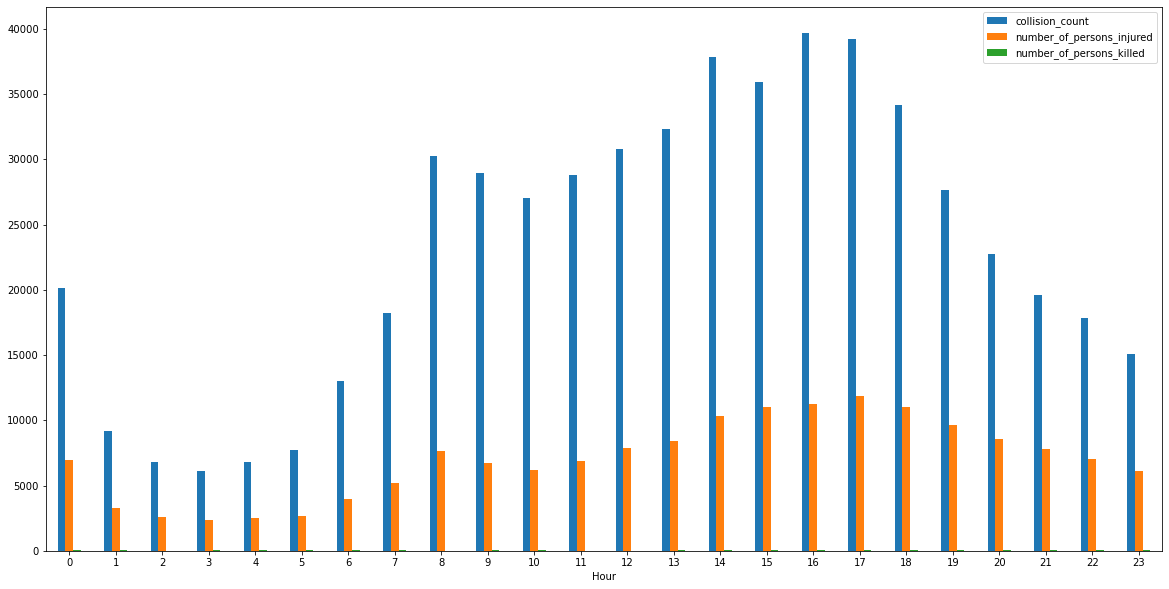

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
df1_Hourly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

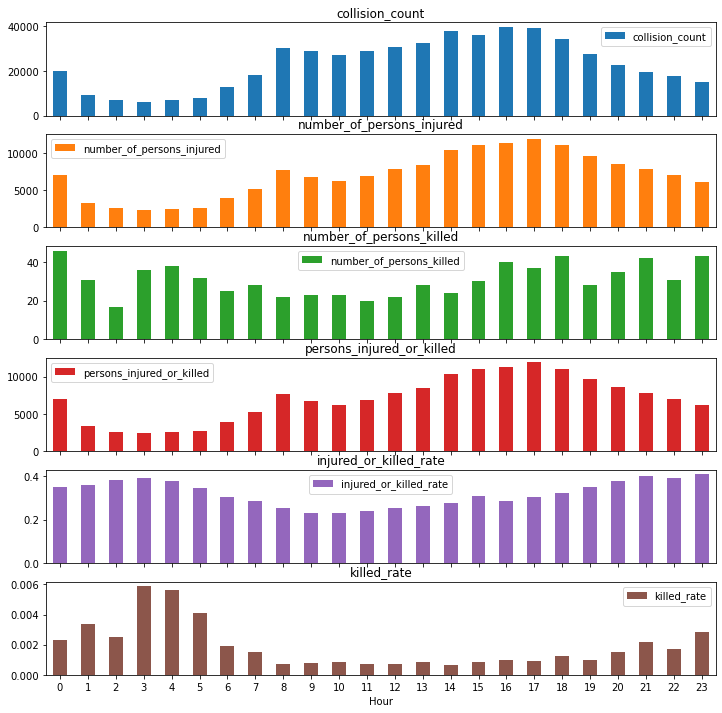

In [ ]:
plt.rcParams["figure.figsize"] = (12,12)
axes =df1_Hourly.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

In [ ]:
df1_2018_2020.tail(50)

,crash_date,crash_time,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,...,vehicle_type_code_3,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5,Date,Month,Year,DOW,Hour,day
694856,2018-01-17,2022-04-20 06:50:00,44 DRIVE,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-17,1,2018,2,6,17
694857,2018-01-12,2022-04-20 15:00:00,19 AVENUE,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-12,1,2018,4,15,12
694858,2018-01-19,2022-04-20 08:50:00,BELT PARKWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-19,1,2018,4,8,19
694859,2018-01-18,2022-04-20 08:52:00,TRIBOROUGH BRIDGE,1.0,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,2018-01-18,1,2018,3,8,18
694860,2018-01-26,2022-04-20 15:28:00,LONG ISLAND EXPRESSWAY,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-26,1,2018,4,15,26
694861,2018-01-27,2022-04-20 19:30:00,WEST 230 STREET,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-27,1,2018,5,19,27
694862,2018-01-07,2022-04-20 21:00:00,NaN,1.0,0.0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,2018-01-07,1,2018,6,21,7
694863,2018-01-15,2022-04-20 11:20:00,CHRISTIE AVENUE,1.0,0.0,0,0,0,0,1,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-01-15,1,2018,0,11,15
694864,2018-01-24,2022-04-20 14:45:00,EAST 196 STREET,1.0,0.0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-24,1,2018,2,14,24
694865,2018-01-17,2022-04-20 17:22:00,NaN,0.0,0.0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2018-01-17,1,2018,2,17,17


#### monthly

In [ ]:
df1_Monthly = df1_2018_2020.groupby(['Month']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Monthly = df1_Monthly.sort_values(by='Month')

df1_Monthly['persons_injured_or_killed'] = df1_Monthly['number_of_persons_injured'] + df1_Monthly['number_of_persons_killed']
df1_Monthly['injured_or_killed_rate'] = df1_Monthly['persons_injured_or_killed'] / df1_Monthly['collision_count']
df1_Monthly['killed_rate'] = df1_Monthly['number_of_persons_killed'] / df1_Monthly['collision_count']
df1_Monthly.set_index('Month',inplace = True)
df1_Monthly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Month,,,,,,
1,49417,13118.0,54.0,13172.0,0.266548,0.001093
2,45759,12265.0,51.0,12316.0,0.269149,0.001115
3,48111,12552.0,43.0,12595.0,0.261790,0.000894
4,39154,10799.0,51.0,10850.0,0.277111,0.001303
5,46594,13947.0,48.0,13995.0,0.300361,0.001030
6,47953,15172.0,76.0,15248.0,0.317978,0.001585
7,47404,15502.0,61.0,15563.0,0.328306,0.001287
8,46678,15782.0,62.0,15844.0,0.339432,0.001328
9,46387,15573.0,91.0,15664.0,0.337681,0.001962


<AxesSubplot:xlabel='Month'>

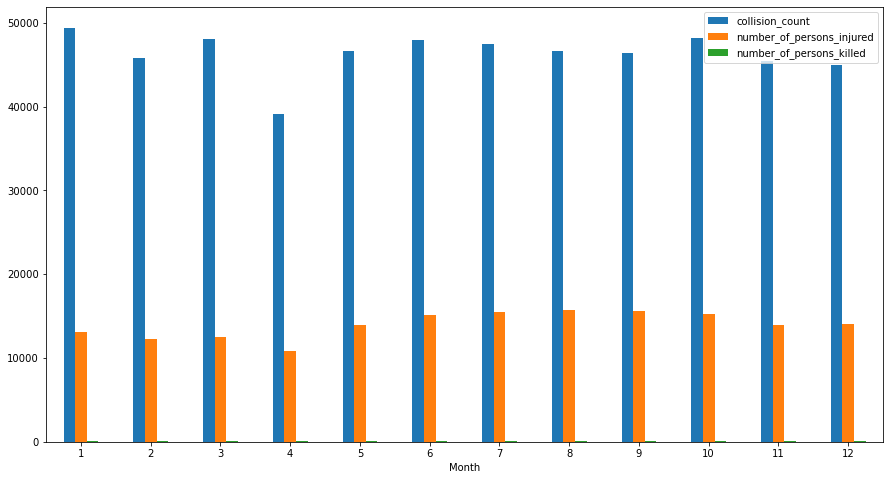

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
df1_Monthly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

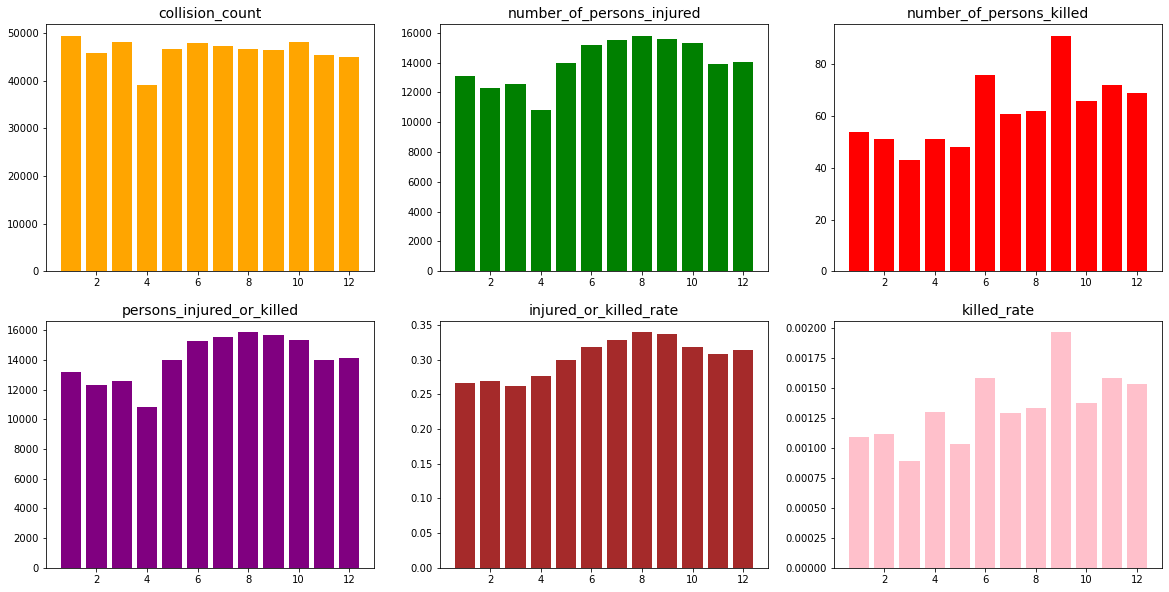

In [ ]:
plt.figure(figsize = (20,10))
c = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Monthly.index, df1_Monthly.iloc[:,M-1],color = c[M])
    plt.title(df1_Monthly.columns[M-1], fontsize = 14)

#### weekly

In [ ]:
df1_Weekly = df1_2018_2020.groupby(['DOW']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Weekly = df1_Weekly.sort_values(by='DOW')

df1_Weekly['persons_injured_or_killed'] = df1_Weekly['number_of_persons_injured'] + df1_Weekly['number_of_persons_killed']
df1_Weekly['injured_or_killed_rate'] = df1_Weekly['persons_injured_or_killed'] / df1_Weekly['collision_count']
df1_Weekly['killed_rate'] = df1_Weekly['number_of_persons_killed'] / df1_Weekly['collision_count']
df1_Weekly.set_index('DOW',inplace = True)
df1_Weekly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
DOW,,,,,,
0,79914,23543.0,116.0,23659.0,0.296056,0.001452
1,82484,24129.0,106.0,24235.0,0.293815,0.001285
2,81106,23409.0,82.0,23491.0,0.289633,0.001011
3,84093,24243.0,98.0,24341.0,0.289453,0.001165
4,88757,25678.0,90.0,25768.0,0.290321,0.001014
5,74468,24459.0,140.0,24599.0,0.330330,0.001880
6,65131,22474.0,112.0,22586.0,0.346778,0.001720


<AxesSubplot:xlabel='DOW'>

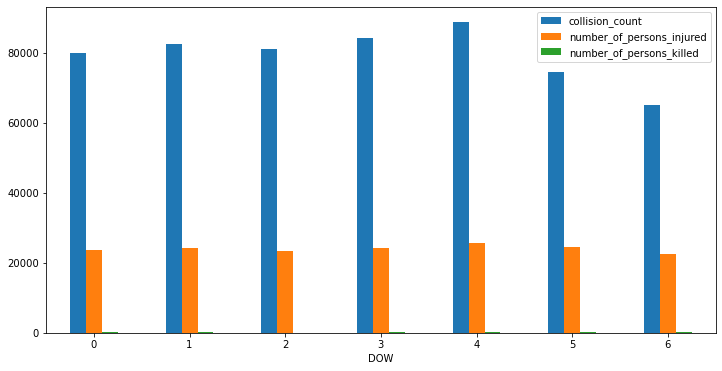

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
df1_Weekly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

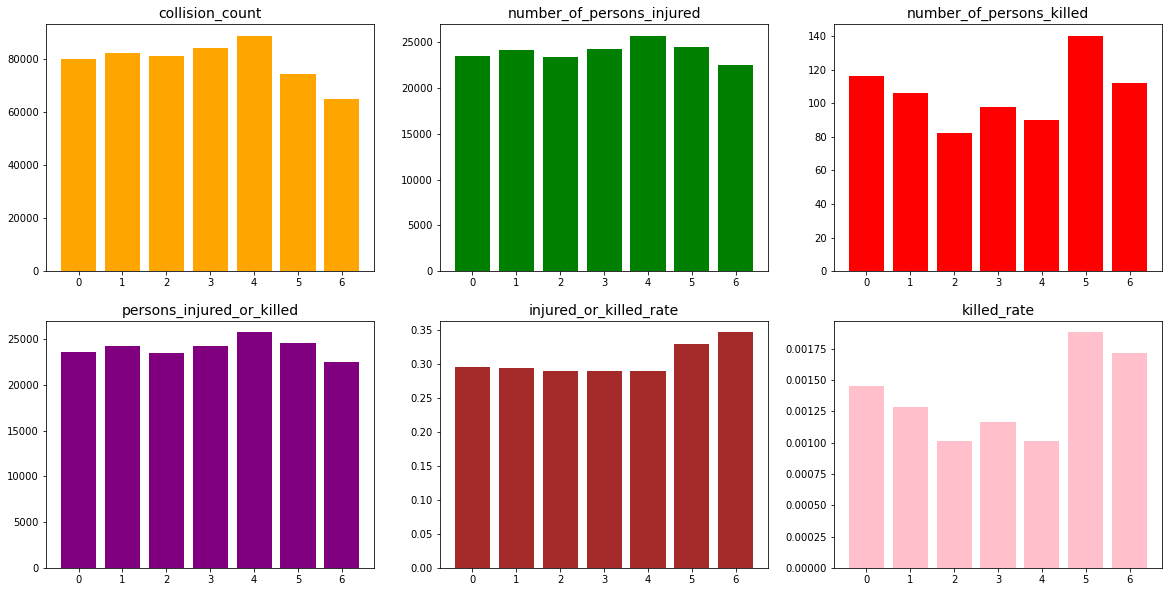

In [ ]:
#plt.rcParams["figure.figsize"] = (8,15)
plt.figure(figsize = (20,10))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Weekly.index, df1_Weekly.iloc[:,M-1],color = c[M])
    plt.title(df1_Weekly.columns[M-1], fontsize = 14)
#axes =df1_Weekly.plot.bar(rot=0, subplots=True)
#axes[1].legend(loc=2)

#### yearly

In [ ]:
df1_Yearly = df1.groupby(['Year']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Yearly = df1_Yearly.sort_values(by='Year')

df1_Yearly['persons_injured_or_killed'] = df1_Yearly['number_of_persons_injured'] + df1_Yearly['number_of_persons_killed']
df1_Yearly['injured_or_killed_rate'] = df1_Yearly['persons_injured_or_killed'] / df1_Yearly['collision_count']
df1_Yearly['killed_rate'] = df1_Yearly['number_of_persons_killed'] / df1_Yearly['collision_count']
df1_Yearly.set_index('Year',inplace = True)
df1_Yearly

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
Year,,,,,,
2012,95247,25866.0,133.0,25999.0,0.272964,0.001396
2013,203734,55124.0,297.0,55421.0,0.272026,0.001458
2014,206033,51223.0,262.0,51485.0,0.249887,0.001272
2015,217694,51358.0,243.0,51601.0,0.237035,0.001116
2016,229831,60317.0,246.0,60563.0,0.263511,0.001070
2017,231007,60656.0,256.0,60912.0,0.263680,0.001108
2018,231563,61941.0,231.0,62172.0,0.268488,0.000998
2019,211485,61389.0,244.0,61633.0,0.291430,0.001154
2020,112905,44605.0,269.0,44874.0,0.397449,0.002383


<AxesSubplot:xlabel='Year'>

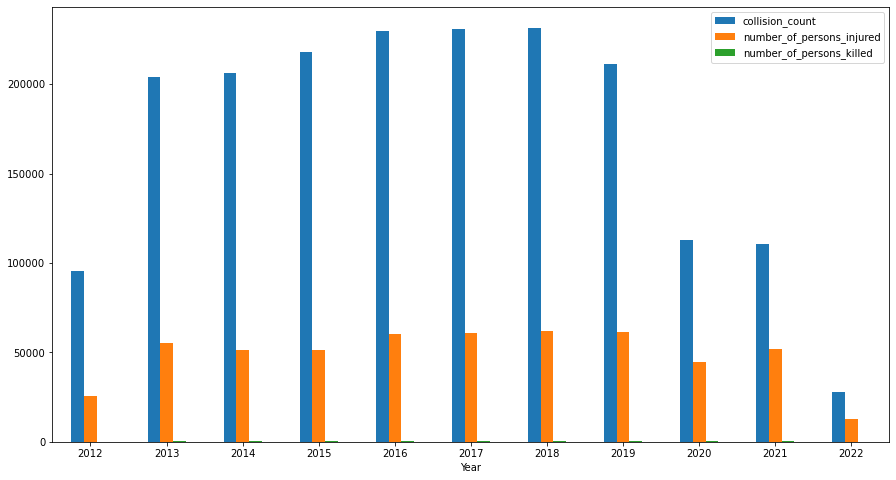

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
df1_Yearly[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

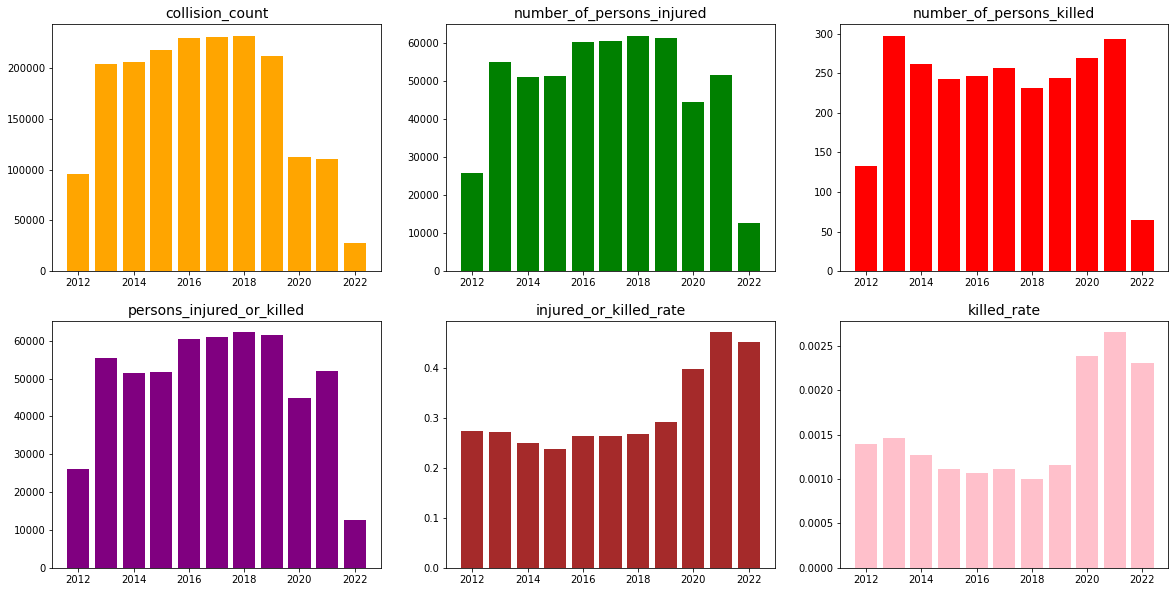

In [ ]:
plt.figure(figsize = (20,10))
for M in range(1,7):
    plt.subplot(2,3,M)
    plt.bar(df1_Yearly.index, df1_Yearly.iloc[:,M-1],color = c[M])
    plt.title(df1_Yearly.columns[M-1], fontsize = 14)

#### daily

In [ ]:
df1_Daily = df1_2018_2020.groupby(['day']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df1_Daily = df1_Daily.sort_values(by='day')

df1_Daily['persons_injured_or_killed'] = df1_Daily['number_of_persons_injured'] + df1_Daily['number_of_persons_killed']
df1_Daily['injured_or_killed_rate'] = df1_Daily['persons_injured_or_killed'] / df1_Daily['collision_count']
df1_Daily['killed_rate'] = df1_Daily['number_of_persons_killed'] / df1_Daily['collision_count']
df1_Daily.set_index('day',inplace = True)
df1_Daily

,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
day,,,,,,
1,1229,385.0,2.0,387.0,0.314890,0.001627
2,1569,422.0,1.0,423.0,0.269598,0.000637
3,1605,409.0,1.0,410.0,0.255452,0.000623
4,1415,363.0,2.0,365.0,0.257951,0.001413
5,1446,344.0,1.0,345.0,0.238589,0.000692
...,...,...,...,...,...,...
362,1220,384.0,2.0,386.0,0.316393,0.001639
363,1100,412.0,1.0,413.0,0.375455,0.000909
364,1166,376.0,0.0,376.0,0.322470,0.000000


<AxesSubplot:xlabel='day'>

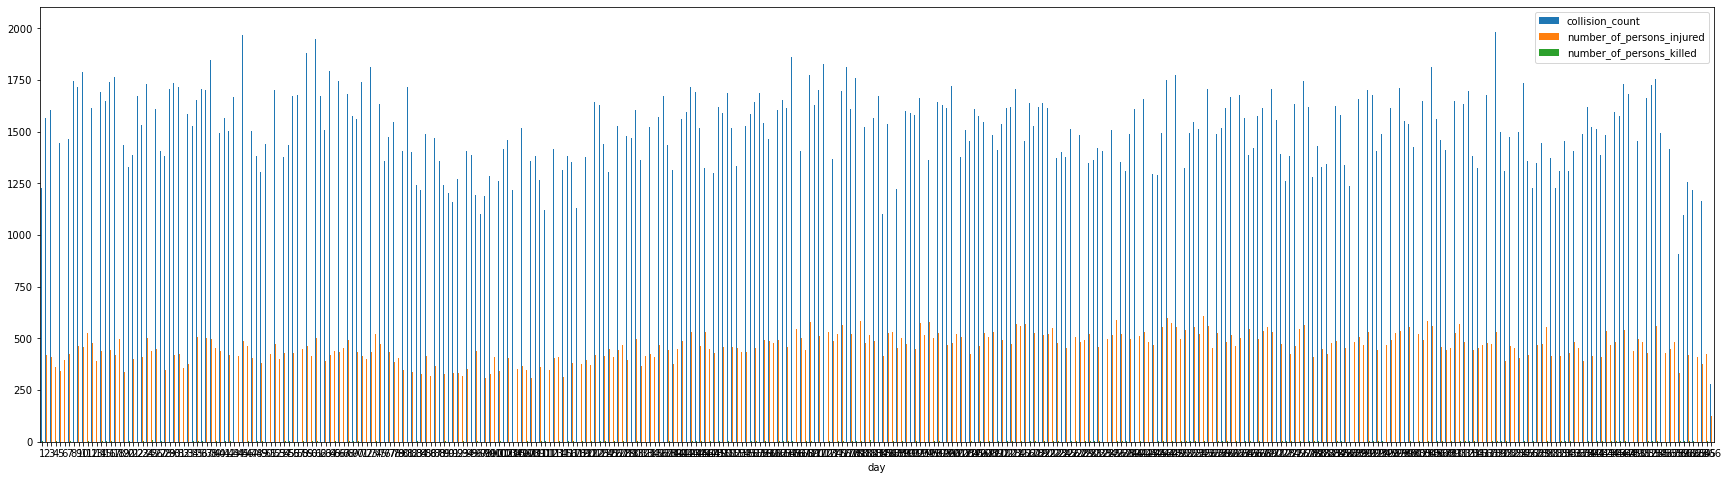

In [ ]:
plt.rcParams["figure.figsize"] = (30,8)
df1_Daily[['collision_count','number_of_persons_injured','number_of_persons_killed']].plot.bar(rot=0)

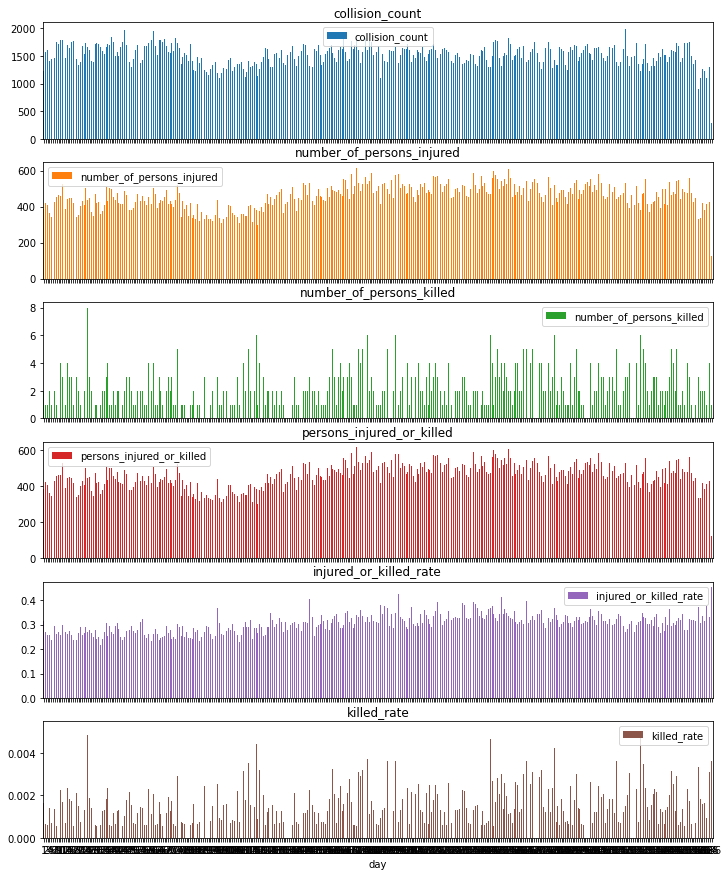

In [ ]:
plt.rcParams["figure.figsize"] = (12,15)
axes =df1_Daily.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)

### Reason Analysis

In [ ]:
Reasons_1 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_1.value_counts())
Reasons_2 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_2.value_counts())
Reasons_3 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_3.value_counts())
Reasons_4 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_4.value_counts())
Reasons_5 = pd.DataFrame(df1_2018_2020.contributing_factor_vehicle_5.value_counts())

In [ ]:
a = pd.merge(Reasons_1,Reasons_2,how = 'outer',left_index=True, right_index=True)
b = pd.merge(a,Reasons_3,how = 'outer',left_index=True, right_index=True)
c = pd.merge(b,Reasons_4,how = 'outer',left_index=True, right_index=True)
d = pd.merge(c,Reasons_5,how = 'outer',left_index=True, right_index=True)

In [ ]:
reason_table = d.fillna(0)
reason_table['total_reason_count'] = reason_table.sum(axis = 1)
reason_table = reason_table.sort_values(by=['total_reason_count'],ascending = False)

In [ ]:
new_reason_table = reason_table[reason_table.total_reason_count>3000]
others = reason_table[reason_table.total_reason_count<3000].sum()
others.name = 'Other Reasons'
new_reason_table = new_reason_table.append(others,ignore_index = False)
new_reason_table = new_reason_table.drop(index=('Unspecified'))

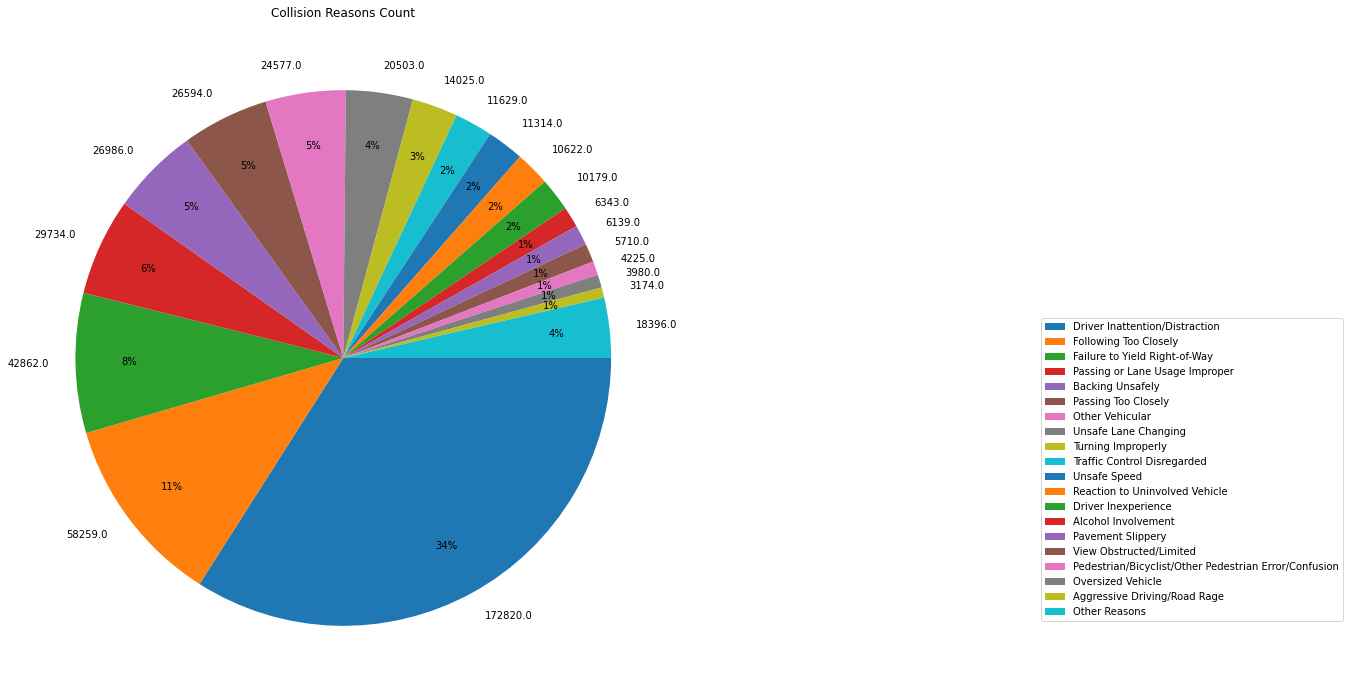

In [ ]:
#new_reason_table['total_reason_count'].plot.pie(counterclock=False)
plt.pie(new_reason_table.total_reason_count,counterclock=False,autopct='%1.0f%%',pctdistance=0.8, labels=new_reason_table.total_reason_count,labeldistance=1.1)
plt.title('Collision Reasons Count')
plt.legend(new_reason_table.index,loc = 'lower right', bbox_to_anchor=(2,0.1))
plt.show()

In [ ]:
reason_table[reason_table.total_reason_count<3000]['total_reason_count']

Brakes Defective                               2152.0
Passenger Distraction                          1948.0
Fell Asleep                                    1713.0
Outside Car Distraction                        1370.0
Obstruction/Debris                             1345.0
Glare                                          1146.0
Steering Failure                                863.0
Failure to Keep Right                           855.0
Tire Failure/Inadequate                         771.0
Pavement Defective                              732.0
Illnes                                          661.0
Lost Consciousness                              616.0
Fatigued/Drowsy                                 608.0
Animals Action                                  543.0
Driverless/Runaway Vehicle                      522.0
Lane Marking Improper/Inadequate                464.0
Drugs (illegal)                                 364.0
Traffic Control Device Improper/Non-Working     349.0
Accelerator Defective       

#### Vehicle Type Analysis

In [ ]:
Vehicle_1 = pd.DataFrame(df1_2018_2020.vehicle_type_code1.value_counts())
Vehicle_2 = pd.DataFrame(df1_2018_2020.vehicle_type_code2.value_counts())
Vehicle_3 = pd.DataFrame(df1_2018_2020.vehicle_type_code_3.value_counts())
Vehicle_4 = pd.DataFrame(df1_2018_2020.vehicle_type_code_4.value_counts())
Vehicle_5 = pd.DataFrame(df1_2018_2020.vehicle_type_code_5.value_counts())

In [ ]:
av = pd.merge(Vehicle_1,Vehicle_2,how = 'outer',left_index=True, right_index=True)
bv = pd.merge(av,Vehicle_3,how = 'outer',left_index=True, right_index=True)
cv = pd.merge(bv,Vehicle_4,how = 'outer',left_index=True, right_index=True)
dv = pd.merge(cv,Vehicle_5,how = 'outer',left_index=True, right_index=True)

In [ ]:
vehicle_table = dv.fillna(0)
vehicle_table['total_vehicle_count'] = vehicle_table.sum(axis = 1)
vehicle_table = vehicle_table.sort_values(by=['total_vehicle_count'],ascending = False)

In [ ]:
new_vehicle_table = vehicle_table[vehicle_table.total_vehicle_count>2000]
othersv = vehicle_table[vehicle_table.total_vehicle_count<2000].sum()
othersv.name = 'Other Vehicle'
new_vehicle_table = new_vehicle_table.append(othersv,ignore_index = False)

In [ ]:
new_vehicle_table.index

Index(['Sedan', 'Station Wagon/Sport Utility Vehicle', 'Taxi', 'Pick-up Truck',
       'Box Truck', 'Bike', 'Bus', 'Tractor Truck Diesel', 'Van', 'Motorcycle',
       'Dump', 'Convertible', 'Ambulance', 'Flat Bed', 'Other Vehicle'],
      dtype='object')

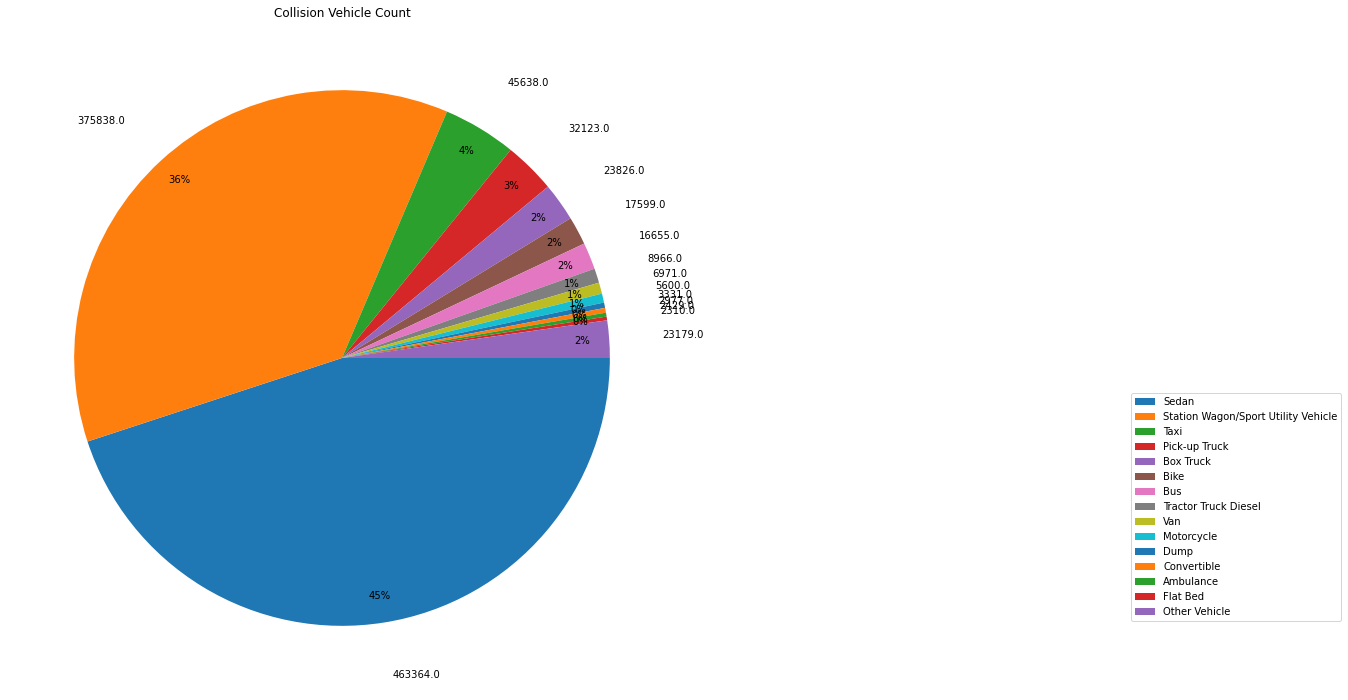

In [ ]:
plt.pie(new_vehicle_table.total_vehicle_count,counterclock=False,autopct='%1.0f%%',pctdistance=0.9, labels=new_vehicle_table.total_vehicle_count,labeldistance=1.2)
plt.title('Collision Vehicle Count')
plt.legend(new_vehicle_table.index,loc = 'lower right', bbox_to_anchor=(2,0.1))
plt.show()

In [ ]:
vehicle_table[vehicle_table.total_vehicle_count<2000]['total_vehicle_count'].head(10)

Garbage or Refuse         1899.0
PK                        1686.0
Carry All                 1442.0
Tractor Truck Gasoline    1273.0
E-Scooter                 1145.0
Tow Truck / Wrecker       1070.0
E-Bike                     953.0
Chassis Cab                745.0
Moped                      734.0
Tanker                     733.0
Name: total_vehicle_count, dtype: float64

### Vehicle In Different Time

In [ ]:
Few_vehivel_classed = df1_2018_2020[df1_2018_2020.vehicle_type_code1.isin(new_vehicle_table.index[:8])]

In [ ]:
Few_vehivel_classed = Few_vehivel_classed[['Hour','vehicle_type_code1']]

In [ ]:
Hour_vehicle = Few_vehivel_classed.groupby(by=['Hour','vehicle_type_code1']).agg({'vehicle_type_code1':'count'})

In [ ]:
Hour_vehicle['vehicle_type_percent'] = 0.000
for i in range(24):
    Hour_vehicle.loc[i]['vehicle_type_percent'] = list(Hour_vehicle.loc[i]['vehicle_type_code1']/sum(Hour_vehicle.loc[i]['vehicle_type_code1']))

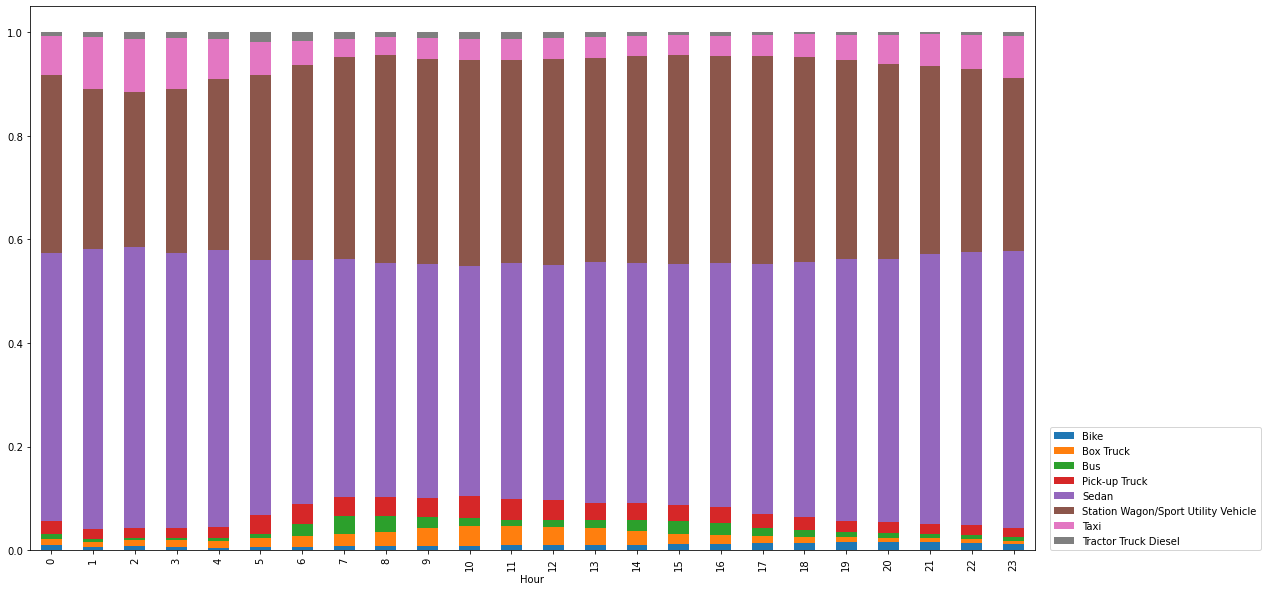

In [ ]:
plt.rcParams["figure.figsize"] = (18,10)
Hour_vehicle['vehicle_type_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.23, -0.01))

### Main Reason In Different Time

In [ ]:
Reasons_only = df1_2018_2020[['Hour','contributing_factor_vehicle_1']]

In [ ]:
most_reasons = ['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing or Lane Usage Improper','Passing Too Closely','Unsafe Lane Changing','Other Vehicular','Turning Improperly','Traffic Control Disregarded','Unsafe Speed','Reaction to Uninvolved Vehicle','Driver Inexperience','Alcohol Involvement']
Reasons_only.loc[~Reasons_only['contributing_factor_vehicle_1'].isin(most_reasons)]= 'Others'

In [ ]:
Hour_Reasons = Reasons_only.groupby(by=['Hour','contributing_factor_vehicle_1']).agg({'contributing_factor_vehicle_1':'count'})

In [ ]:
Hour_Reasons['reasons_percent'] = 0.000
for i in range(24):
    Hour_Reasons.loc[i]['reasons_percent'] = list(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']/sum(Hour_Reasons.loc[i]['contributing_factor_vehicle_1']))

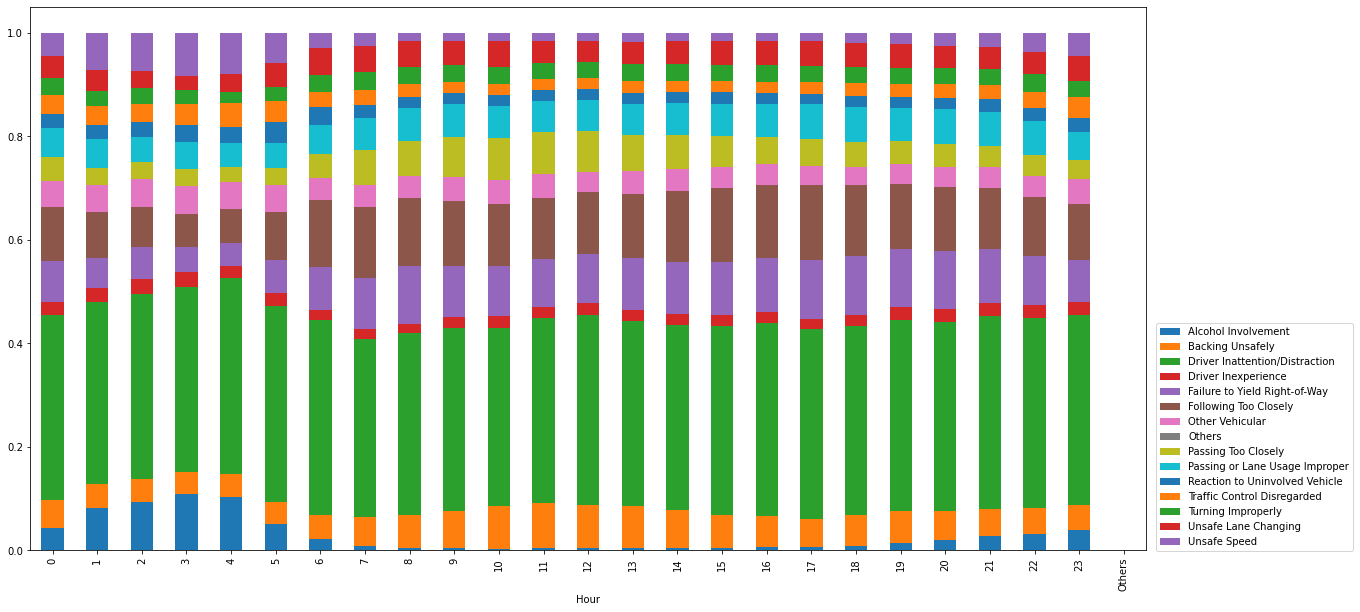

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
Hour_Reasons['reasons_percent'].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='lower right', bbox_to_anchor=(1.19, -0.01))

### Geo Distribution(collision number)

<AxesSubplot:>

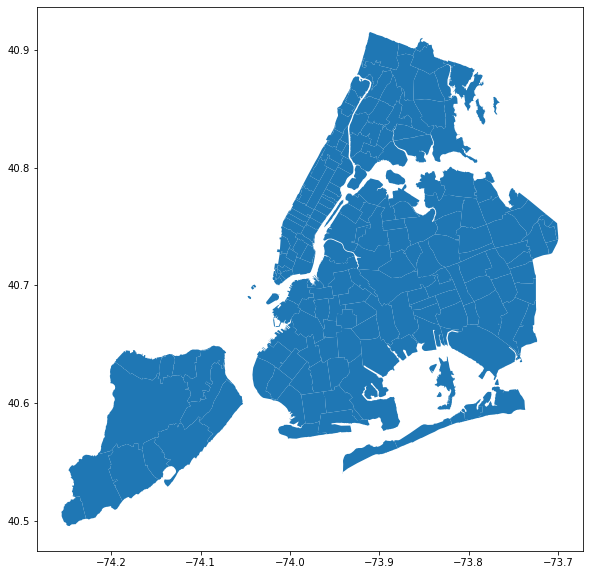

In [ ]:
NYCzip=gpd.read_file(r"E:\Desk\NYU\Applied data\Group work\NY.geojson")
NYCzip.plot()

In [ ]:
df_drop_empty_zipcode_2018_2020.columns

Index(['crash_date', 'crash_time', 'on_street_name',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough',
       'zip_code', 'latitude', 'longitude', 'location', 'cross_street_name',
       'off_street_name', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'vehicle_type_code_3',
       'vehicle_type_code_4', 'contributing_factor_vehicle_5',
       'vehicle_type_code_5', 'Date', 'Month', 'Year', 'DOW', 'Hour', 'day'],
      dtype='object')

In [ ]:
Zipcode_distribution = df_drop_empty_zipcode_2018_2020.groupby(['zip_code']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [ ]:
CollisionGeo = Zipcode_distribution.merge(NYCzip,left_on='zip_code',right_on='zipcode')

In [ ]:
CollisionGeo=CollisionGeo.loc[(CollisionGeo.zipcode>=10000)&(CollisionGeo.zipcode<11500)]
CollisionGeo.drop_duplicates(subset=['zipcode'],inplace=True)
CollisionGeo = gpd.GeoDataFrame(CollisionGeo,geometry = CollisionGeo['geometry'])

In [ ]:
CollisionGeo['persons_injured_or_killed'] = CollisionGeo['number_of_persons_injured'] + CollisionGeo['number_of_persons_killed']
CollisionGeo['injured_or_killed_rate'] = CollisionGeo['persons_injured_or_killed'] / CollisionGeo['collision_count']
CollisionGeo['killed_rate'] = CollisionGeo['number_of_persons_killed'] / CollisionGeo['collision_count']
#CollisionGeo.set_index('day',inplace = True)

In [ ]:
CollisionGeo.columns

Index(['zip_code', 'collision_count', 'number_of_persons_injured',
       'number_of_persons_killed', 'zipcode', 'geometry',
       'persons_injured_or_killed', 'injured_or_killed_rate', 'killed_rate'],
      dtype='object')

[Text(0.5, 1.0, 'killed_rate')]

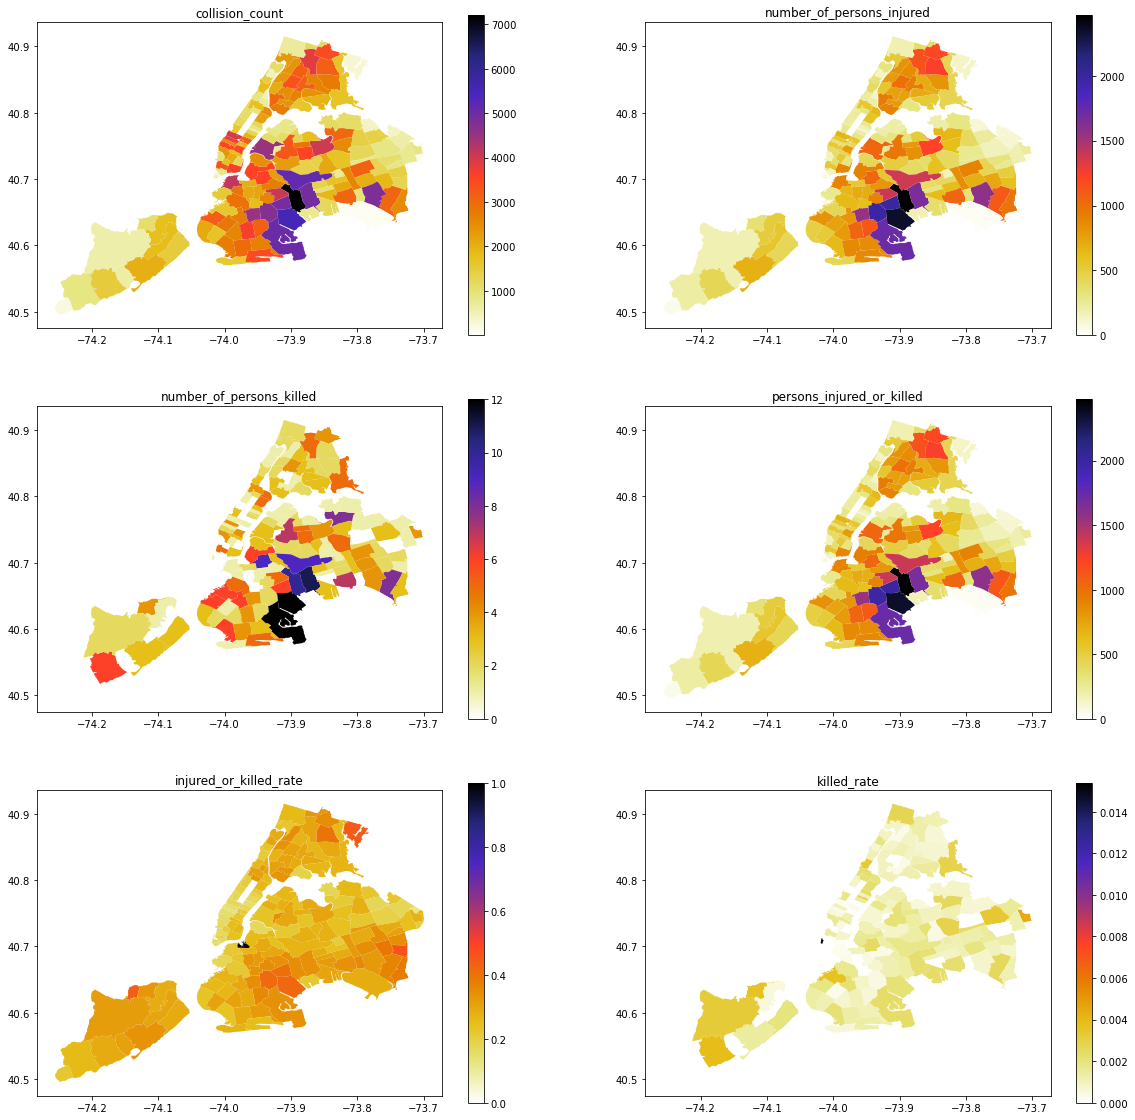

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(3, 2)

CollisionGeo.plot(ax = ax[0,0], column='collision_count',cmap='CMRmap_r', legend=True,k=10);ax[0,0].set(title='collision_count')
CollisionGeo.plot(ax = ax[0,1], column='number_of_persons_injured',cmap='CMRmap_r', legend=True,k=10);ax[0,1].set(title='number_of_persons_injured')
CollisionGeo.plot(ax = ax[1,0], column='number_of_persons_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,0].set(title='number_of_persons_killed')
CollisionGeo.plot(ax = ax[1,1], column='persons_injured_or_killed',cmap='CMRmap_r', legend=True,k=10);ax[1,1].set(title='persons_injured_or_killed')
CollisionGeo.plot(ax = ax[2,0], column='injured_or_killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,0].set(title='injured_or_killed_rate')
CollisionGeo.plot(ax = ax[2,1], column='killed_rate',cmap='CMRmap_r', legend=True,k=10);ax[2,1].set(title='killed_rate')

In [ ]:
CollisionGeo.head()

,zip_code,collision_count,number_of_persons_injured,number_of_persons_killed,zipcode,geometry,persons_injured_or_killed,injured_or_killed_rate,killed_rate
0,10001.0,3539,530.0,2.0,10001.0,"POLYGON Z ((-74.00827 40.75259 0.00000, -74.00...",532.0,0.150325,0.000565
1,10002.0,3642,890.0,3.0,10002.0,"POLYGON Z ((-73.97442 40.73642 0.00000, -73.97...",893.0,0.245195,0.000824
2,10003.0,2078,532.0,1.0,10003.0,"POLYGON Z ((-73.97986 40.73497 0.00000, -73.98...",533.0,0.256497,0.000481
3,10004.0,558,89.0,0.0,10004.0,"POLYGON Z ((-74.00597 40.70432 0.00000, -74.00...",89.0,0.159498,0.000000
7,10005.0,299,45.0,0.0,10005.0,"POLYGON Z ((-74.00597 40.70432 0.00000, -74.00...",45.0,0.150502,0.000000


In [ ]:
df_drop_empty_zipcode_2018_2020_1 = df_drop_empty_zipcode_2018_2020[['zip_code','collision_id','number_of_persons_injured','number_of_persons_killed','Date']]
df_drop_empty_zipcode_2018_2020_1

,zip_code,collision_id,number_of_persons_injured,number_of_persons_killed,Date
13,11201.0,4136992,0.0,0.0,2019-05-21
1032,10019.0,4408441,1.0,0.0,2020-04-17
4573,11436.0,4412513,0.0,0.0,2020-05-02
4964,10036.0,4411898,0.0,0.0,2020-12-31
8263,10032.0,4415453,2.0,0.0,2020-05-10
...,...,...,...,...,...
694896,11204.0,3828035,1.0,0.0,2018-01-11
694900,11385.0,3828610,0.0,0.0,2018-01-13
694901,11203.0,3837602,0.0,0.0,2018-01-26
694903,10034.0,3830852,1.0,0.0,2018-01-14


In [ ]:
Zipcode_distribution1 = df_drop_empty_zipcode_2018_2020_1.groupby(['zip_code','Date']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [ ]:
Zipcode_distribution1

,zip_code,Date,collision_count,number_of_persons_injured,number_of_persons_killed
0,10000.0,2018-01-09,1,0.0,0.0
1,10000.0,2018-01-27,1,0.0,0.0
2,10000.0,2018-02-07,1,0.0,0.0
3,10000.0,2018-02-14,1,0.0,0.0
4,10000.0,2018-02-17,1,0.0,0.0
...,...,...,...,...,...
136993,11697.0,2020-10-08,1,1.0,0.0
136994,11697.0,2020-10-17,1,0.0,0.0
136995,11697.0,2020-11-05,1,0.0,0.0
136996,11697.0,2020-11-24,1,0.0,0.0


# Data Preproccesing for the Time-series Model

In [ ]:
df2_Monthly = df1_2018_2020.groupby(['Date']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()
df2_Monthly = df2_Monthly.sort_values(by='Date')

df2_Monthly['persons_injured_or_killed'] = df2_Monthly['number_of_persons_injured'] + df2_Monthly['number_of_persons_killed']
df2_Monthly['injured_or_killed_rate'] = df2_Monthly['persons_injured_or_killed'] / df2_Monthly['collision_count']
df2_Monthly['killed_rate'] = df2_Monthly['number_of_persons_killed'] / df2_Monthly['collision_count']

df2_Monthly.set_index('Date',inplace = False)
df2_Monthly.head()

,Date,collision_count,number_of_persons_injured,number_of_persons_killed,persons_injured_or_killed,injured_or_killed_rate,killed_rate
0,2018-01-01,453,125.0,0.0,125.0,0.275938,0.000000
1,2018-01-02,654,160.0,0.0,160.0,0.244648,0.000000
2,2018-01-03,645,154.0,0.0,154.0,0.238760,0.000000
3,2018-01-04,464,60.0,0.0,60.0,0.129310,0.000000
4,2018-01-05,700,115.0,1.0,116.0,0.165714,0.001429


In [ ]:
len(df2_Monthly)

1096

In [ ]:
df2_Monthly['Date'] = pd.to_datetime(df2_Monthly['Date']).dt.to_period('M')
df2_Monthly = df2_Monthly.groupby(['Date'])[['collision_count','persons_injured_or_killed']].sum().reset_index()
#df2_Monthly.set_index('Date',inplace = True)
df2_Monthly.head(100)

,Date,collision_count,persons_injured_or_killed
0,2018-01,18122,4475.0
1,2018-02,15990,4064.0
2,2018-03,19274,4770.0
3,2018-04,18195,4693.0
4,2018-05,20843,5681.0
5,2018-06,20796,5639.0
6,2018-07,19707,5509.0
7,2018-08,19642,5575.0
8,2018-09,19237,5599.0
9,2018-10,20820,5675.0


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

#from IPython.display import Image

import seaborn as sns
sns.set()

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import numpy as np
from scipy.signal import periodogram
import statsmodels.api as sm
import dask.dataframe as dd

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
import warnings
warnings.filterwarnings('ignore')

# For dataset on Monthly Collision count from 2018 to 2020

In [ ]:
lm=sm.OLS(df2_Monthly.collision_count[:36],sm.add_constant(df2_Monthly.Date.index[:36])).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     67.30
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           1.43e-09
Time:                        14:29:41   Log-Likelihood:                -335.81
No. Observations:                  36   AIC:                             675.6
Df Residuals:                      34   BIC:                             678.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.189e+04    914.410     23.943      0.0

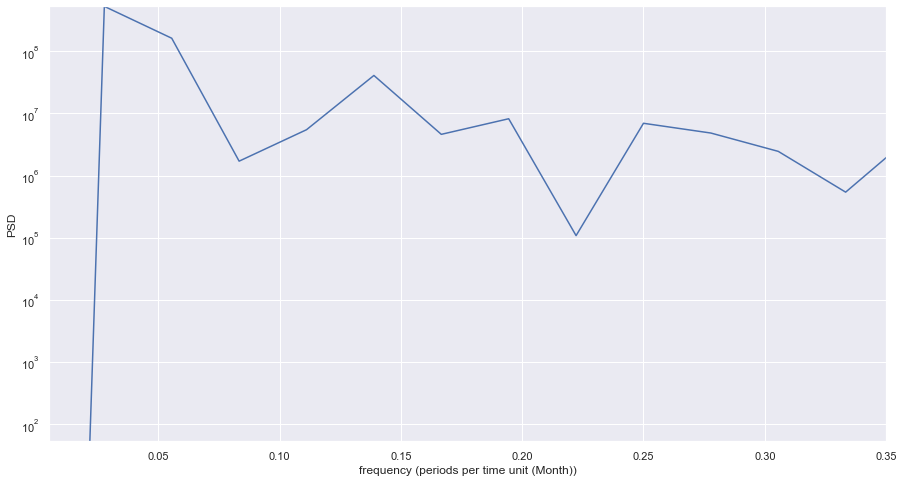

Strongest period length = 18.0


In [ ]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df2_Monthly['collision_count'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Month))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e7,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (Total 36 months) 
PSD = PSD[f>0.02778]
f = f[f>0.02778] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

In [ ]:
from statsmodels.tsa.stattools import adfuller

series=df2_Monthly['collision_count']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.748015
p-value: 0.833918
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


From the above result, the P-value is 0.833918 meaning that we can't reject the null hypothesis, so the time-series is not stationary.

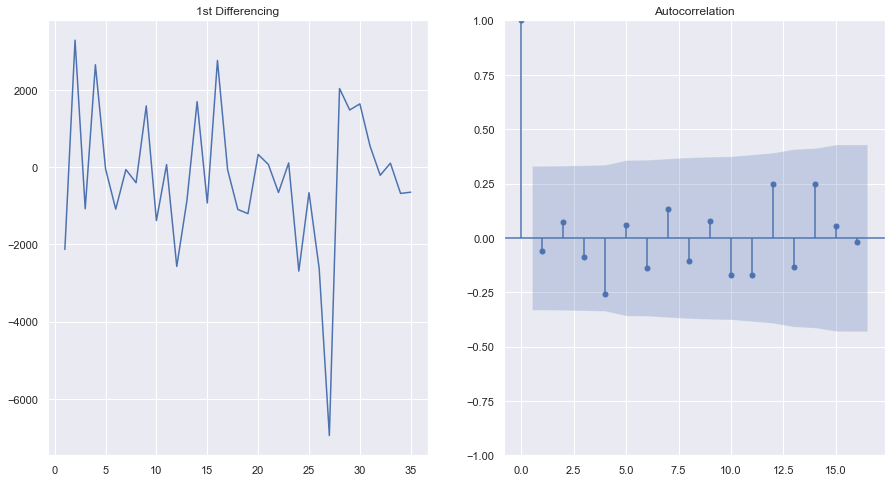

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].plot(df2_Monthly['collision_count'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1])

plt.show()

From the above result, we could choose MA(q) = 1.

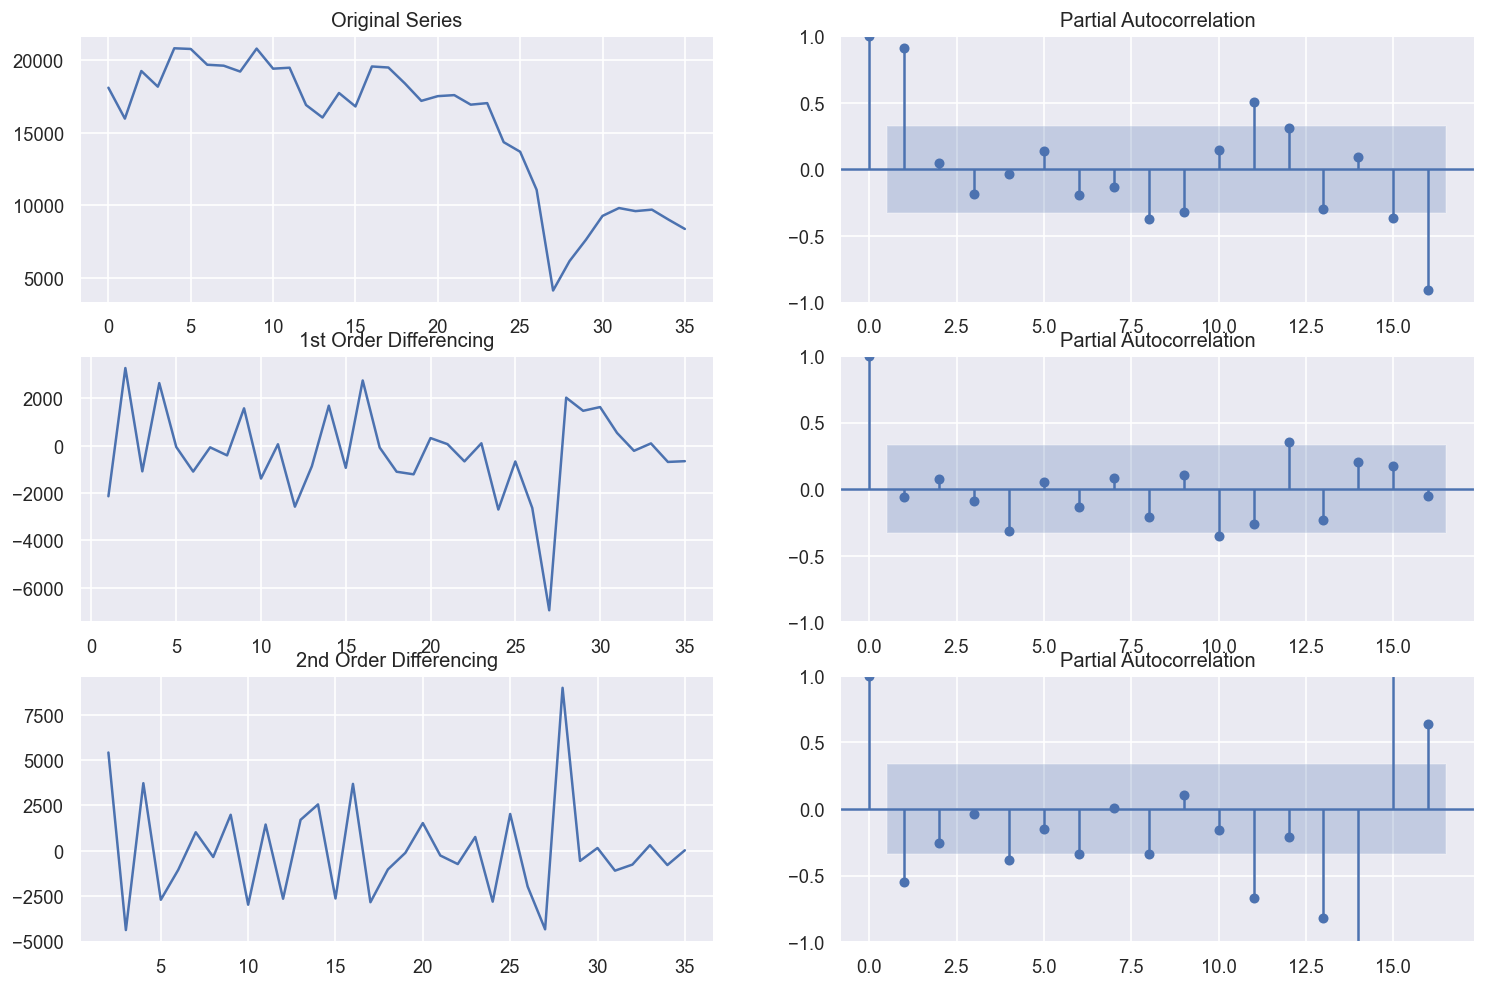

In [ ]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df2_Monthly['collision_count']); axes[0, 0].set_title('Original Series')
plot_pacf(df2_Monthly['collision_count'], ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df2_Monthly['collision_count'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(df2_Monthly['collision_count'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df2_Monthly['collision_count'].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

From the above result and 1st Order Differencing, we could choose d = 1.

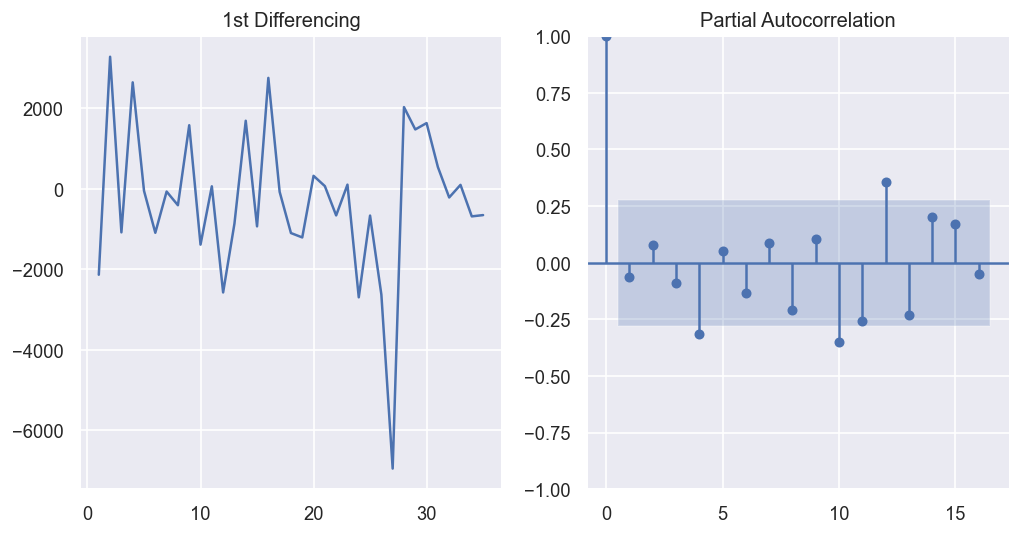

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df2_Monthly['collision_count'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df2_Monthly['collision_count'].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

From the above result and 1st Order Differencing, we could choose AR(q) = 1.

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

                               SARIMAX Results                                
Dep. Variable:        collision_count   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -196.367
Date:                Wed, 20 Apr 2022   AIC                            398.735
Time:                        14:29:44   BIC                            402.141
Sample:                             0   HQIC                           399.591
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6761      0.208     -3.251      0.001      -1.084      -0.268
ma.L1          0.4675      0.317      1.476      0.140      -0.153       1.088
sigma2      1.466e+06   6.03e+05      2.432      0.0

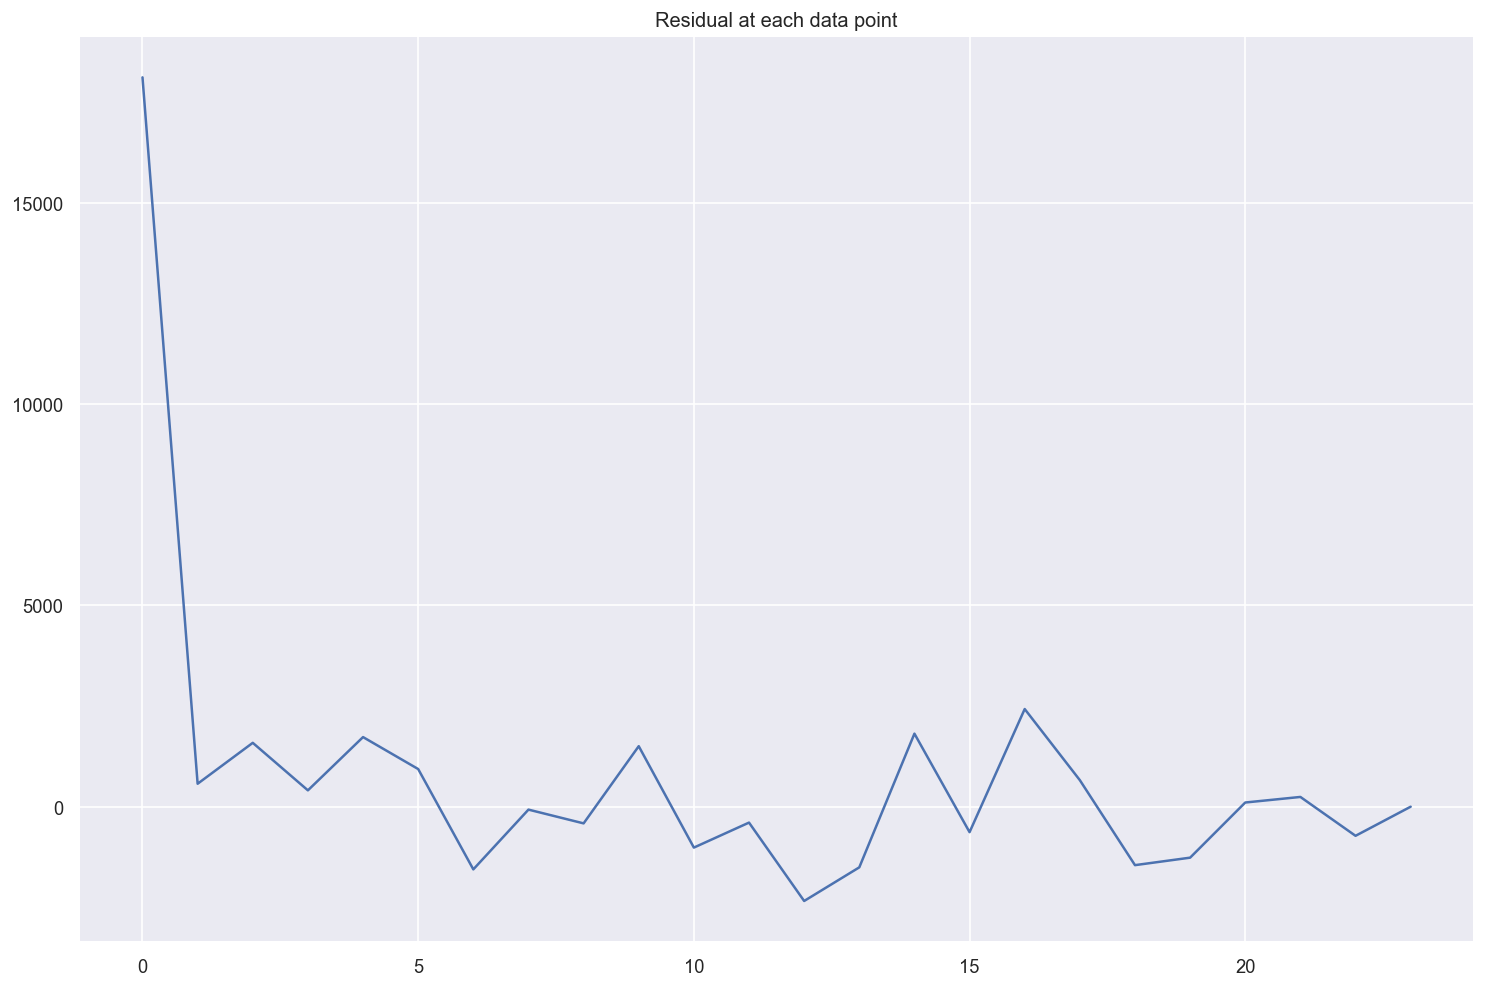

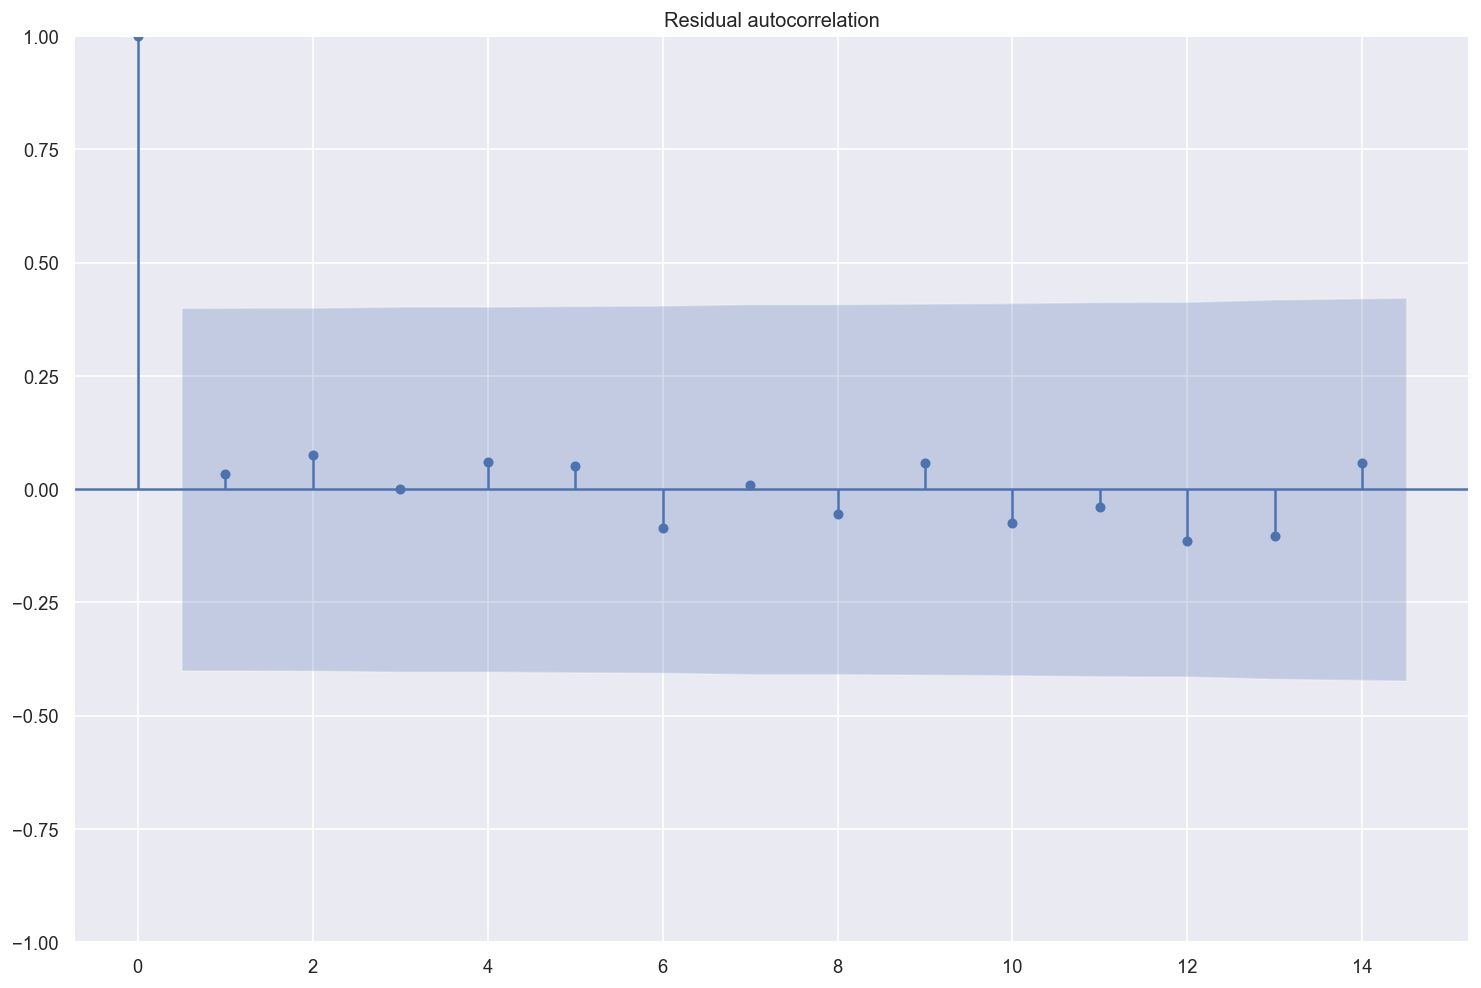

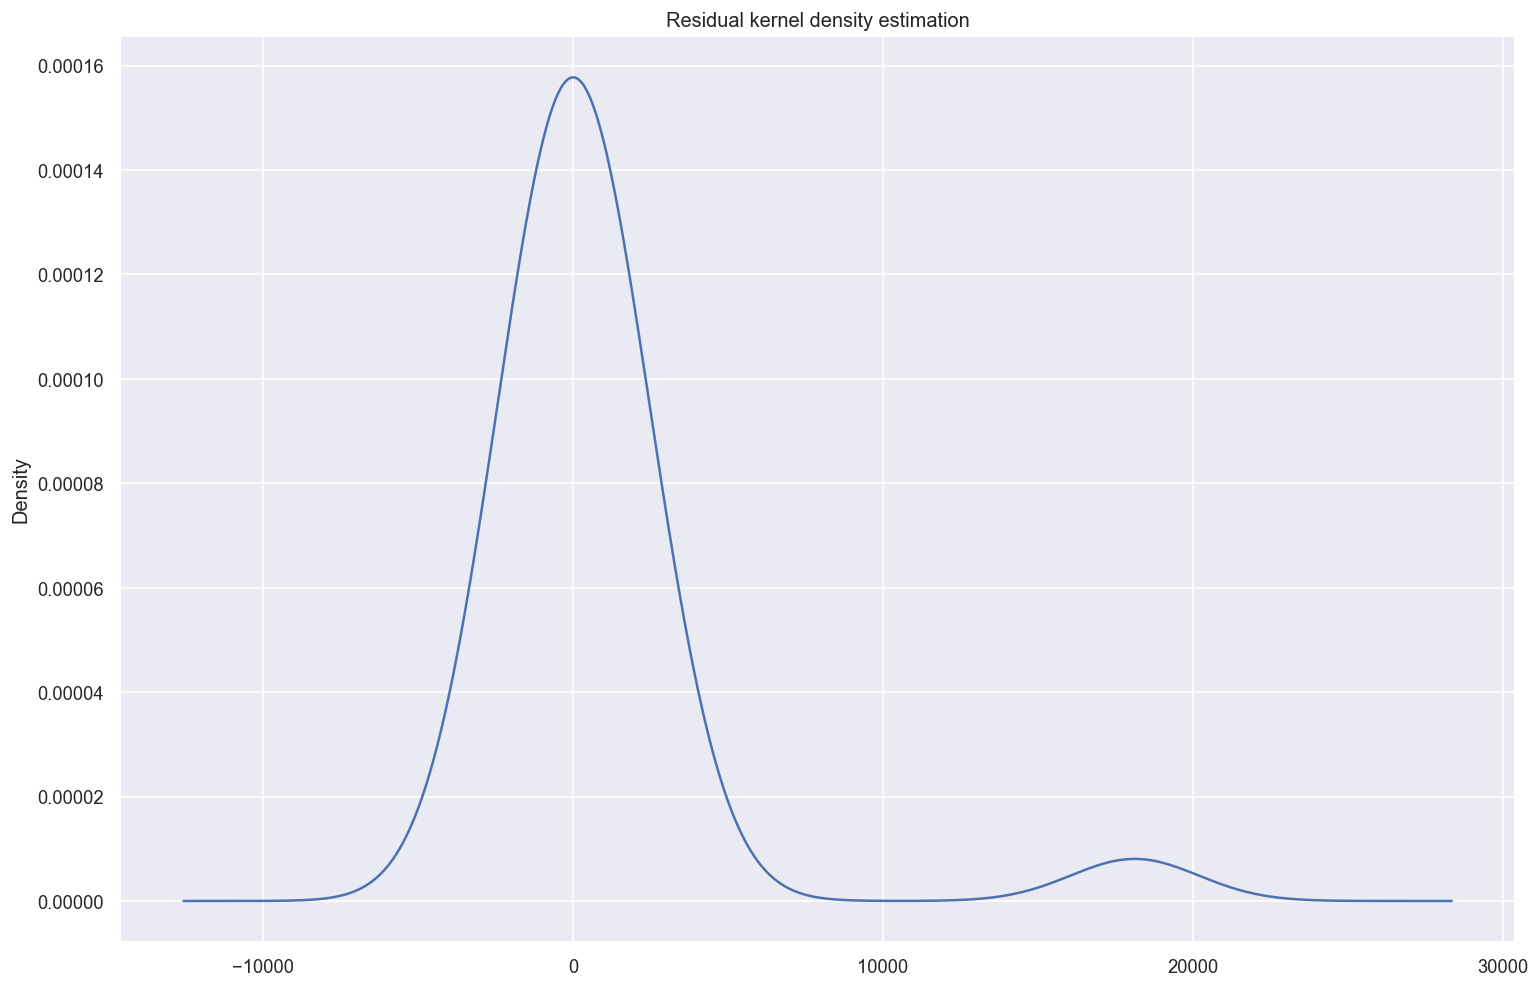

                  0
count     24.000000
mean     779.665892
std     3894.413965
min    -2343.176454
25%     -796.978091
50%       51.548632
75%     1077.154229
max    18122.000000
p value is  5.964355421689825e-12
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.028480   0.865985
2  0.194507   0.907326
3  0.194544   0.978465
4  0.302737   0.989637


In [ ]:
#Build the ARIMA Model, training on the 24-month dataset
P=1
D=1
Q=1

# fit model
N = 24
series = df2_Monthly['collision_count']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [ ]:

X = pd.DataFrame(range(N),columns=['Month'])
X = sm.add_constant(X)
lm=sm.OLS(df2_Monthly['collision_count'][:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     3.575
Date:                Wed, 20 Apr 2022   Prob (F-statistic):             0.0719
Time:                        14:29:44   Log-Likelihood:                -206.89
No. Observations:                  24   AIC:                             417.8
Df Residuals:                      22   BIC:                             420.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.936e+04    554.628     34.904      0.0

In [ ]:
df2_Monthly.head(50)

,Date,collision_count,persons_injured_or_killed
0,2018-01,18122,4475.0
1,2018-02,15990,4064.0
2,2018-03,19274,4770.0
3,2018-04,18195,4693.0
4,2018-05,20843,5681.0
5,2018-06,20796,5639.0
6,2018-07,19707,5509.0
7,2018-08,19642,5575.0
8,2018-09,19237,5599.0
9,2018-10,20820,5675.0


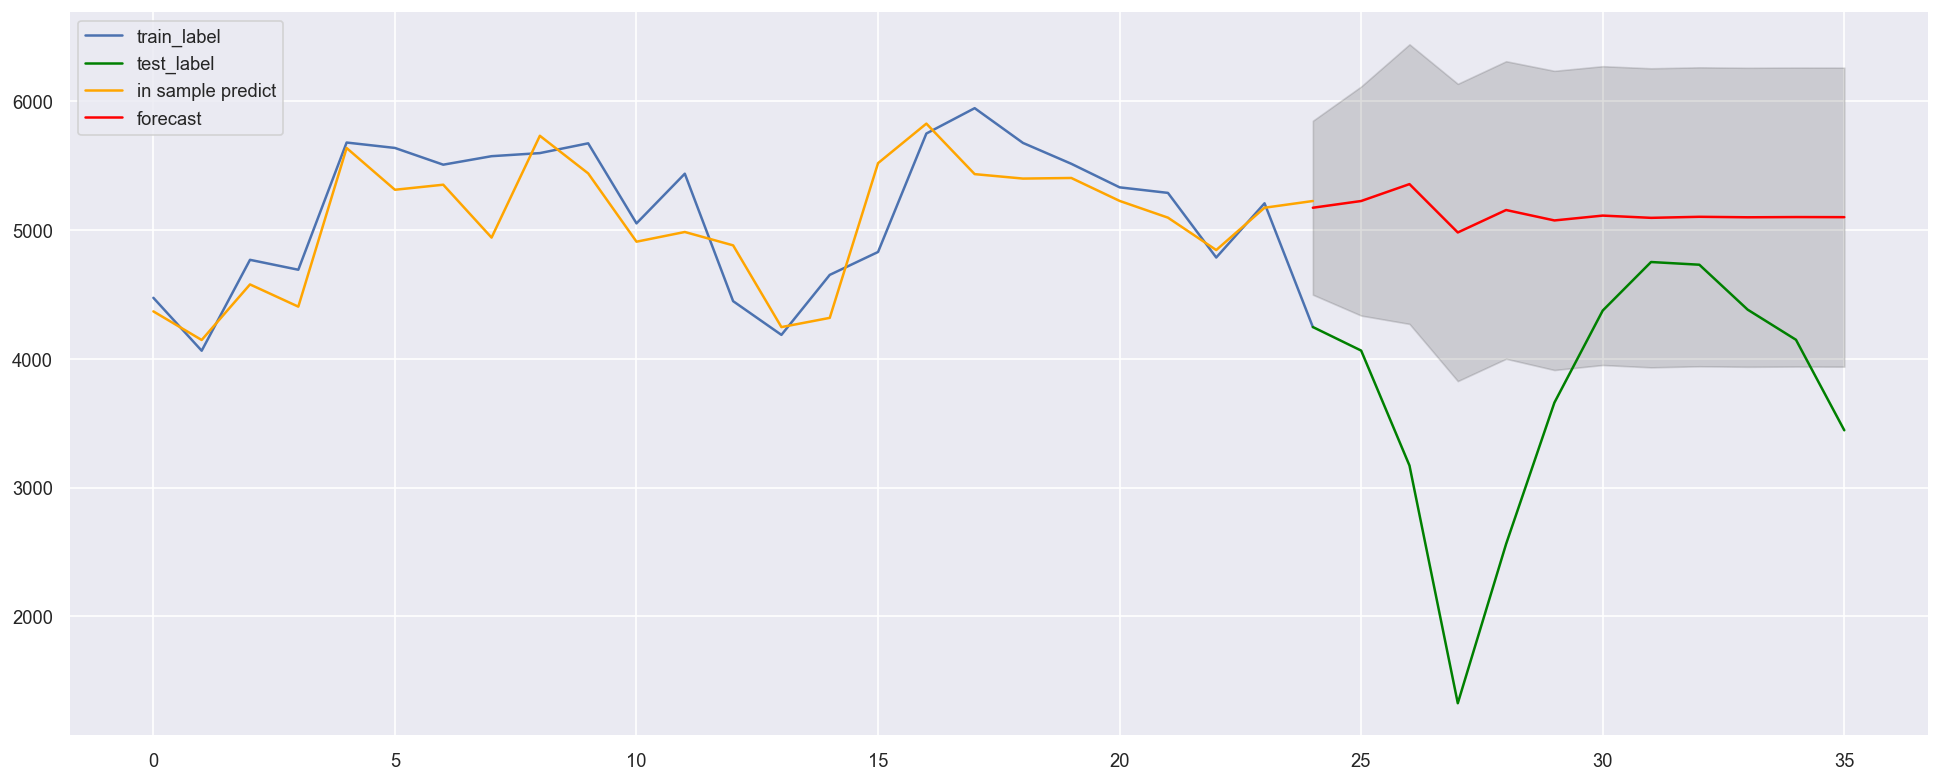

In [ ]:
# Forecast

fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df2_Monthly.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

In [ ]:
series

0     18122
1     15990
2     19274
3     18195
4     20843
5     20796
6     19707
7     19642
8     19237
9     20820
10    19436
11    19501
12    16929
13    16065
14    17759
15    16829
16    19588
17    19516
18    18420
19    17215
20    17541
21    17611
22    16953
23    17059
24    14366
25    13704
26    11078
27     4130
28     6163
29     7641
30     9277
31     9821
32     9609
33     9710
34     9028
35     8378
Name: collision_count, dtype: int64

In [ ]:
fc_series

24    16987.115568
25    17035.714485
26    17002.858209
27    17025.071356
28    17010.053711
29    17020.206692
30    17013.342565
31    17017.983196
32    17014.845804
33    17016.966901
34    17015.532891
35    17016.502382
Name: mean, dtype: float64

In [ ]:
X = pd.DataFrame(range(N-1,len(df2_Monthly)),columns=['Month'])
X = sm.add_constant(X)
pred = lm.predict(X)

In [ ]:
X

,const,Month
0,1.0,23
1,1.0,24
2,1.0,25
3,1.0,26
4,1.0,27
5,1.0,28
6,1.0,29
7,1.0,30
8,1.0,31
9,1.0,32


In [ ]:
P

1

In [ ]:
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:N+1],series[N:N+1],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N].index,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),
        color='orange',label='in sample predict')

In [ ]:
model_fit.predict()

0        0.000000
1     4369.550445
2     4147.376724
3     4578.927312
4     4406.321643
5     5638.584702
6     5314.172852
7     5353.463809
8     4942.688901
9     5733.493391
10    5441.308949
11    4910.852904
12    4986.230190
13    4882.462376
14    4247.420959
15    4319.201700
16    5521.033473
17    5827.928041
18    5435.652773
19    5401.100453
20    5405.723598
21    5227.674470
22    5097.685736
23    4846.003375
Name: predicted_mean, dtype: float64

In [ ]:
df2_Monthly['collision_count'].mean()

15443.138888888889

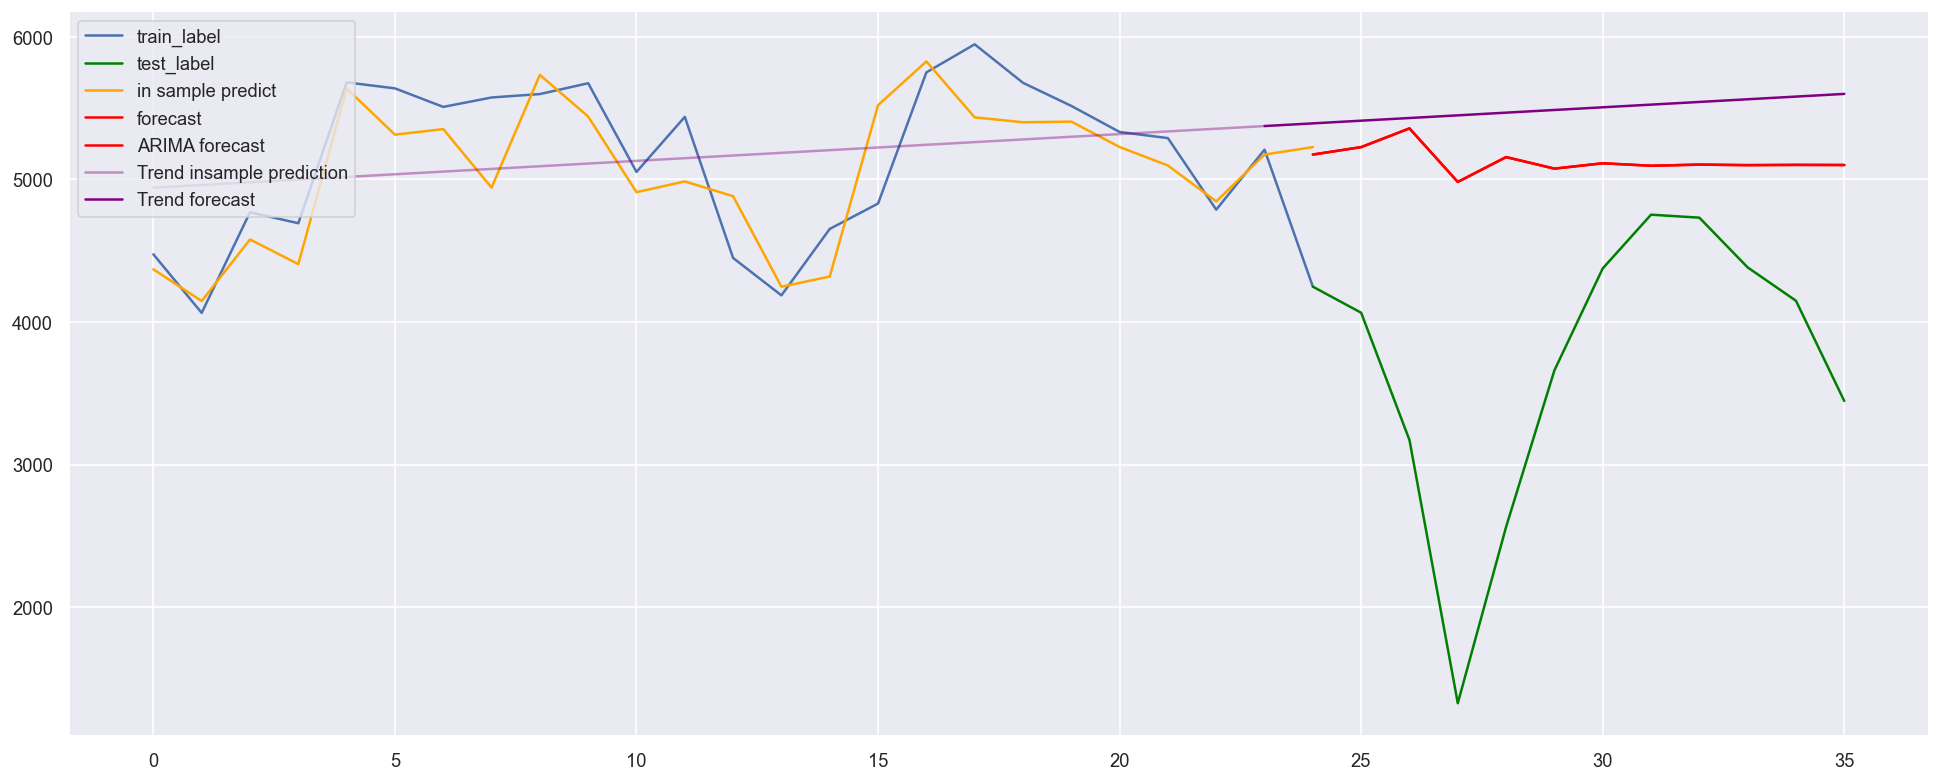

In [ ]:
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.plot(fc_series, label='ARIMA forecast', color='red')

ax.plot(insample, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df2_Monthly)),pred, label='Trend forecast', color='purple')

plt.legend(loc='upper left')

# For dataset on Monthly persons_injured_or_killed count from 2018 to 2020

In [ ]:
df2_Monthly.head()

,Date,collision_count,persons_injured_or_killed
0,2018-01,18122,4475.0
1,2018-02,15990,4064.0
2,2018-03,19274,4770.0
3,2018-04,18195,4693.0
4,2018-05,20843,5681.0


In [ ]:
lm=sm.OLS(df2_Monthly.persons_injured_or_killed[:36],sm.add_constant(df2_Monthly.persons_injured_or_killed.index[:36])).fit()
print (lm.summary())

                                OLS Regression Results                               
Dep. Variable:     persons_injured_or_killed   R-squared:                       0.221
Model:                                   OLS   Adj. R-squared:                  0.198
Method:                        Least Squares   F-statistic:                     9.630
Date:                       Wed, 20 Apr 2022   Prob (F-statistic):            0.00384
Time:                               14:29:45   Log-Likelihood:                -294.16
No. Observations:                         36   AIC:                             592.3
Df Residuals:                             34   BIC:                             595.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

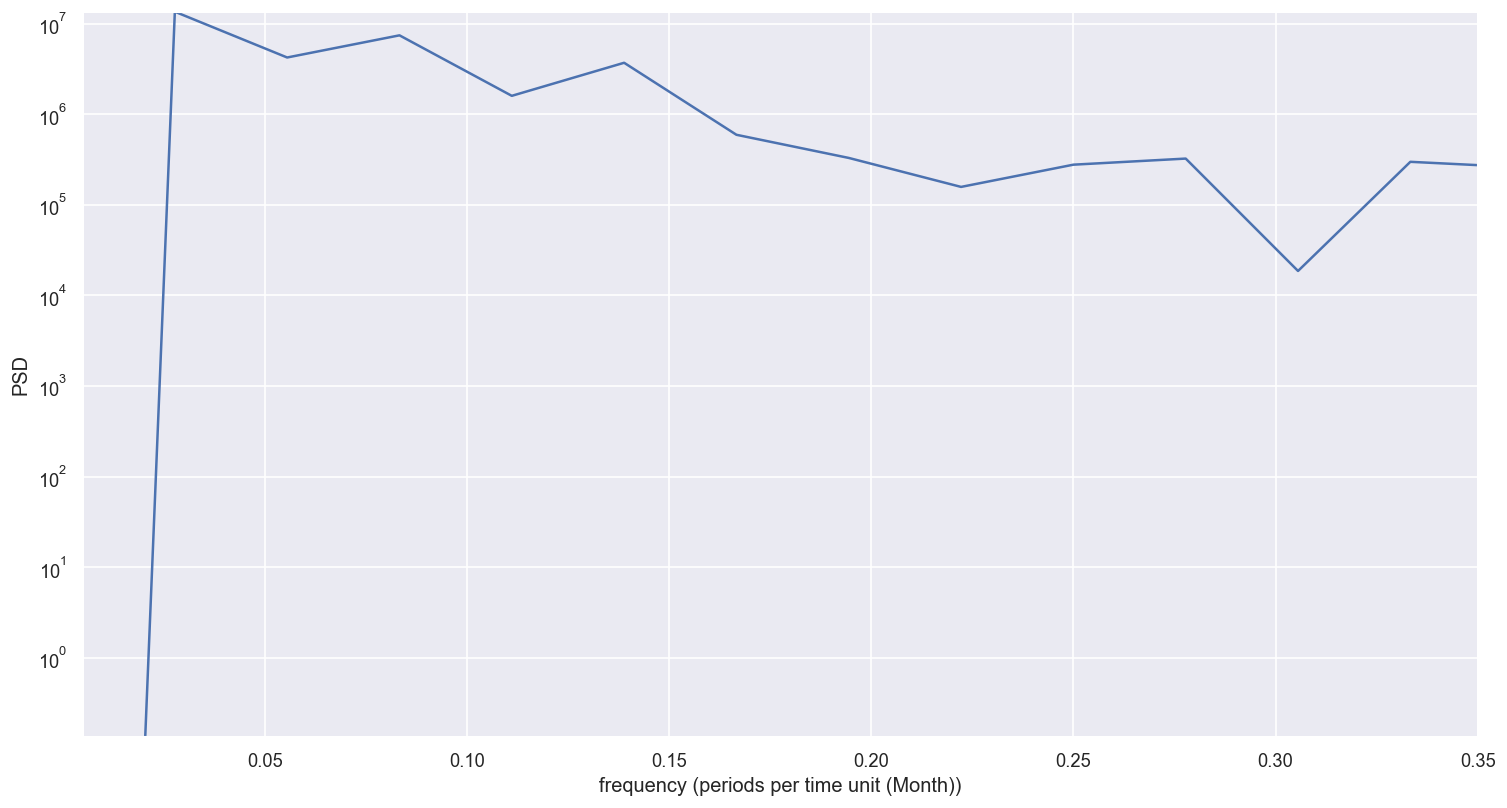

Strongest period length = 12.0


In [ ]:
plt.figure(figsize = (15,8))
f, PSD = scipy.signal.periodogram(df2_Monthly['persons_injured_or_killed'])
plt.semilogy(f, PSD)
plt.xlabel('frequency (periods per time unit (Month))')
plt.ylabel('PSD')
plt.xlim(0.005,0.35) 
plt.ylim(max(PSD)/1e8,max(PSD)) #show strength up to 1e-6 of the max

#filter outputs - periods shorter than 3 years (Total 36 weeks) 
PSD = PSD[f>0.02778]
f = f[f>0.02778] 
plt.show()
print('Strongest period length = {}'.format(1/f[np.argmax(PSD)])) 

In [ ]:
from statsmodels.tsa.stattools import adfuller

series=df2_Monthly['persons_injured_or_killed']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.775080
p-value: 0.392902
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


From the above result, the P-value is 0.392902 meaning that we can't reject the null hypothesis, so the time-series is not stationary.

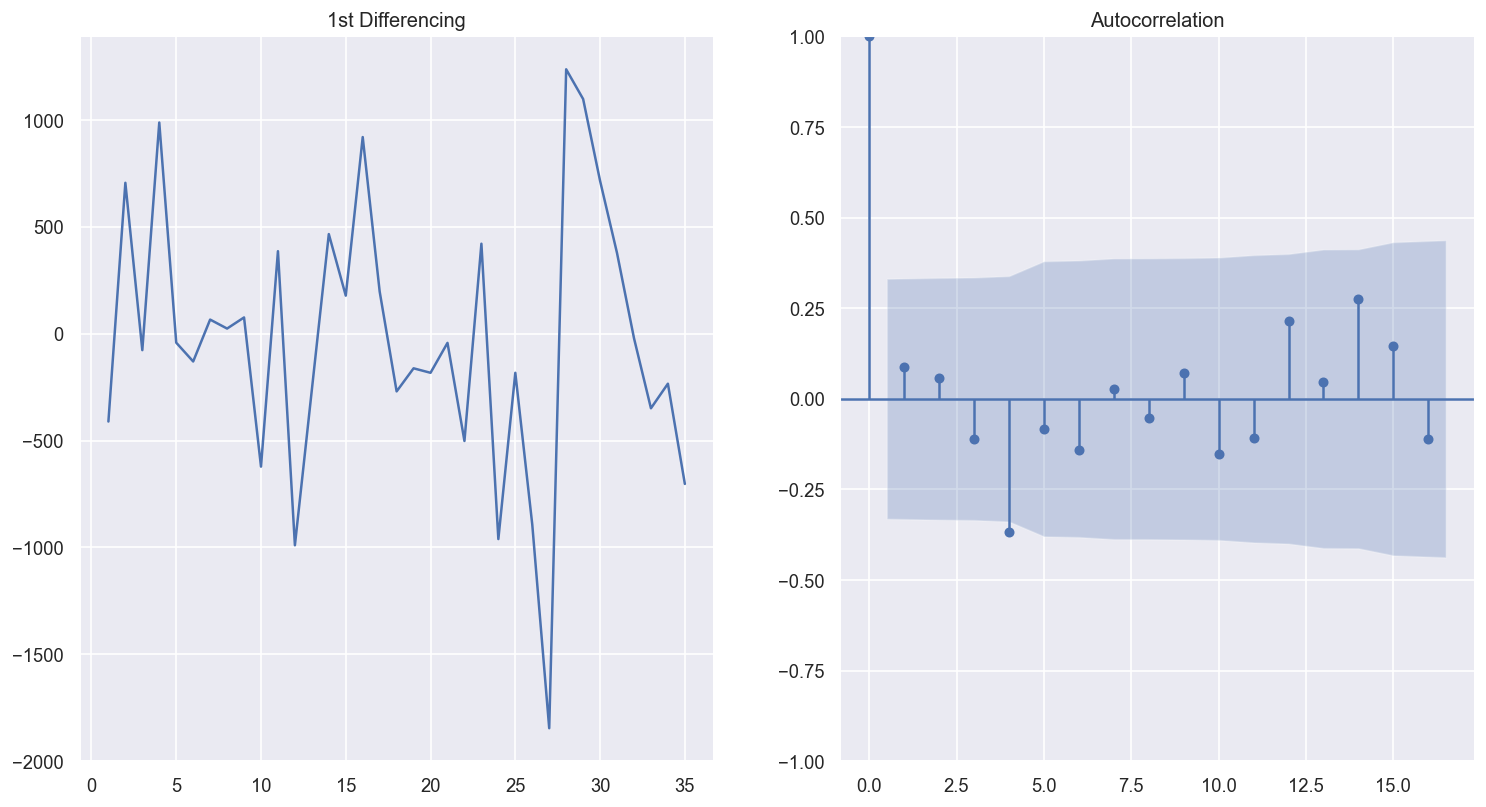

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
axes[0].plot(df2_Monthly['persons_injured_or_killed'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1])

plt.show()

From the above result, we could choose MA(p) = 1.

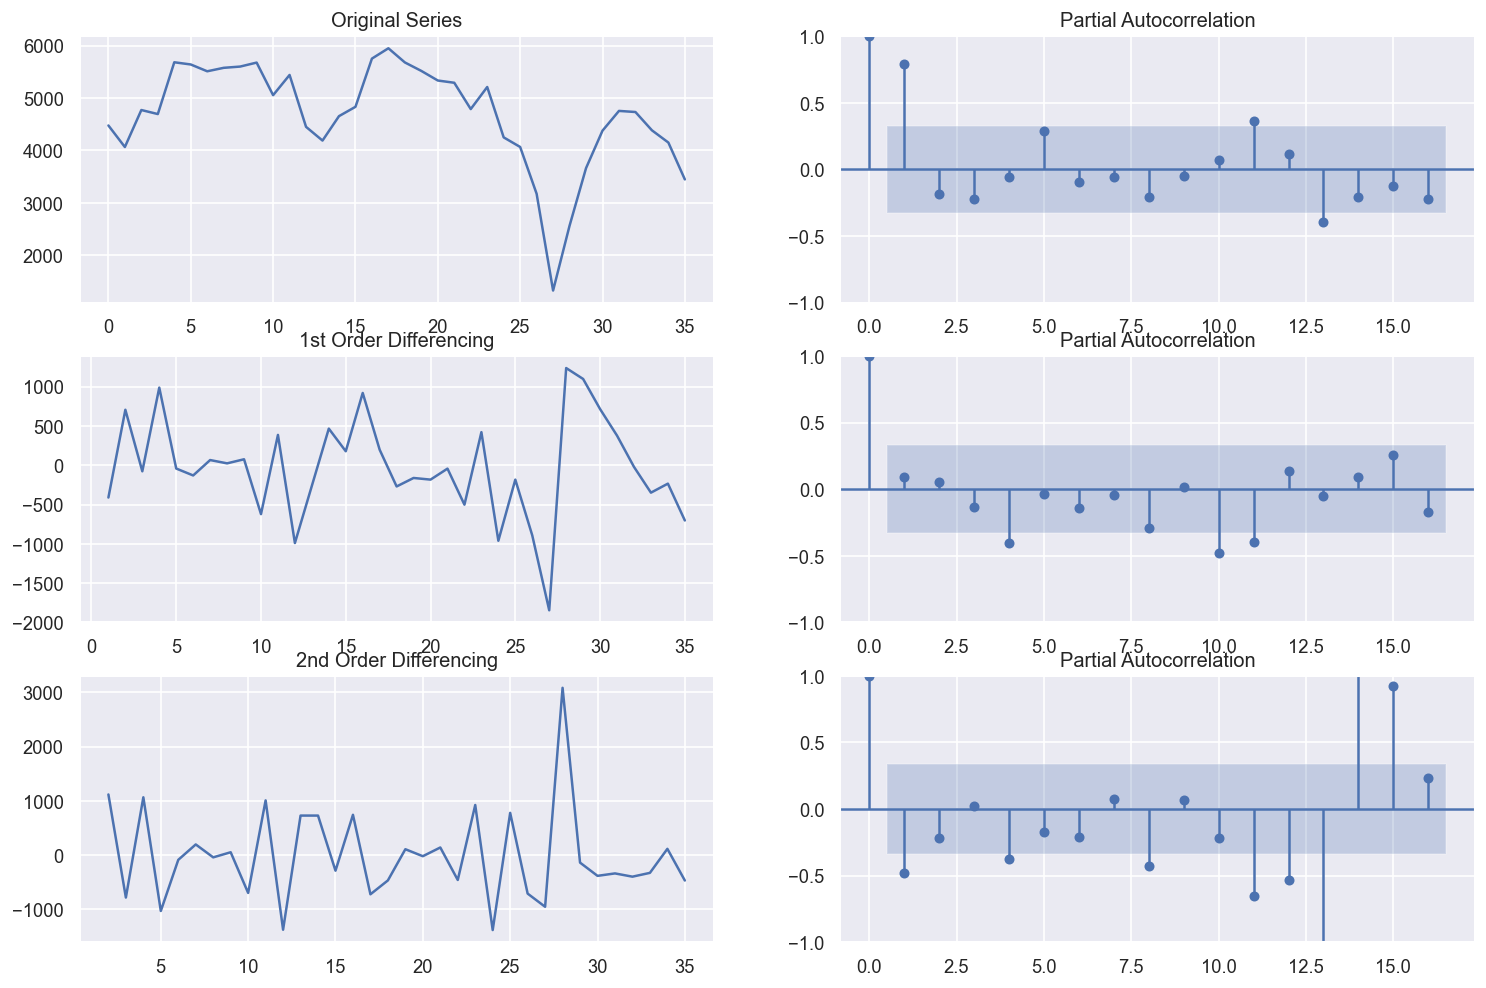

In [ ]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df2_Monthly['persons_injured_or_killed']); axes[0, 0].set_title('Original Series')
plot_pacf(df2_Monthly['persons_injured_or_killed'], ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation')

# 1st Differencing
axes[1, 0].plot(df2_Monthly['persons_injured_or_killed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1, 1])
axes[1, 1].set_title('Partial Autocorrelation')

# 2nd Differencing
axes[2, 0].plot(df2_Monthly['persons_injured_or_killed'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().diff().dropna(), ax=axes[2, 1])
axes[2, 1].set_title('Partial Autocorrelation')

plt.show()

From the above result, we could choose d = 1.

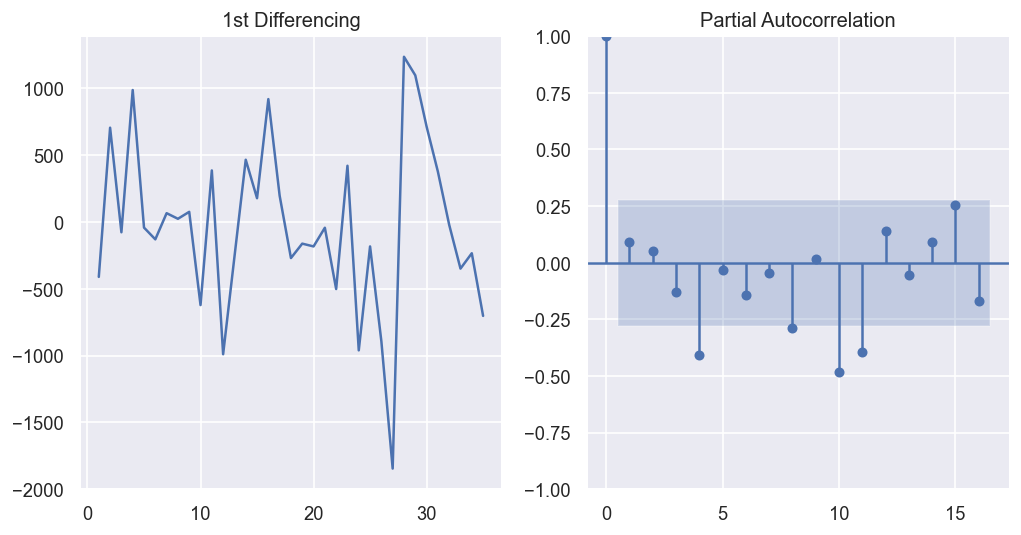

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df2_Monthly['persons_injured_or_killed'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df2_Monthly['persons_injured_or_killed'].diff().dropna(), ax=axes[1],alpha=0.1) #plot differences between consequtive observations

plt.show()

From the above result, we could choose AR(q) = 4.

                                   SARIMAX Results                                   
Dep. Variable:     persons_injured_or_killed   No. Observations:                   24
Model:                        ARIMA(1, 1, 4)   Log Likelihood                -172.449
Date:                       Wed, 20 Apr 2022   AIC                            356.897
Time:                               14:29:48   BIC                            363.710
Sample:                                    0   HQIC                           358.611
                                        - 24                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4643      0.212     -2.194      0.028      -0.879      -0.049
ma.L1          0.3301   2.97e+04   1.11e-05      1.000   -5.82e+04    5.82e

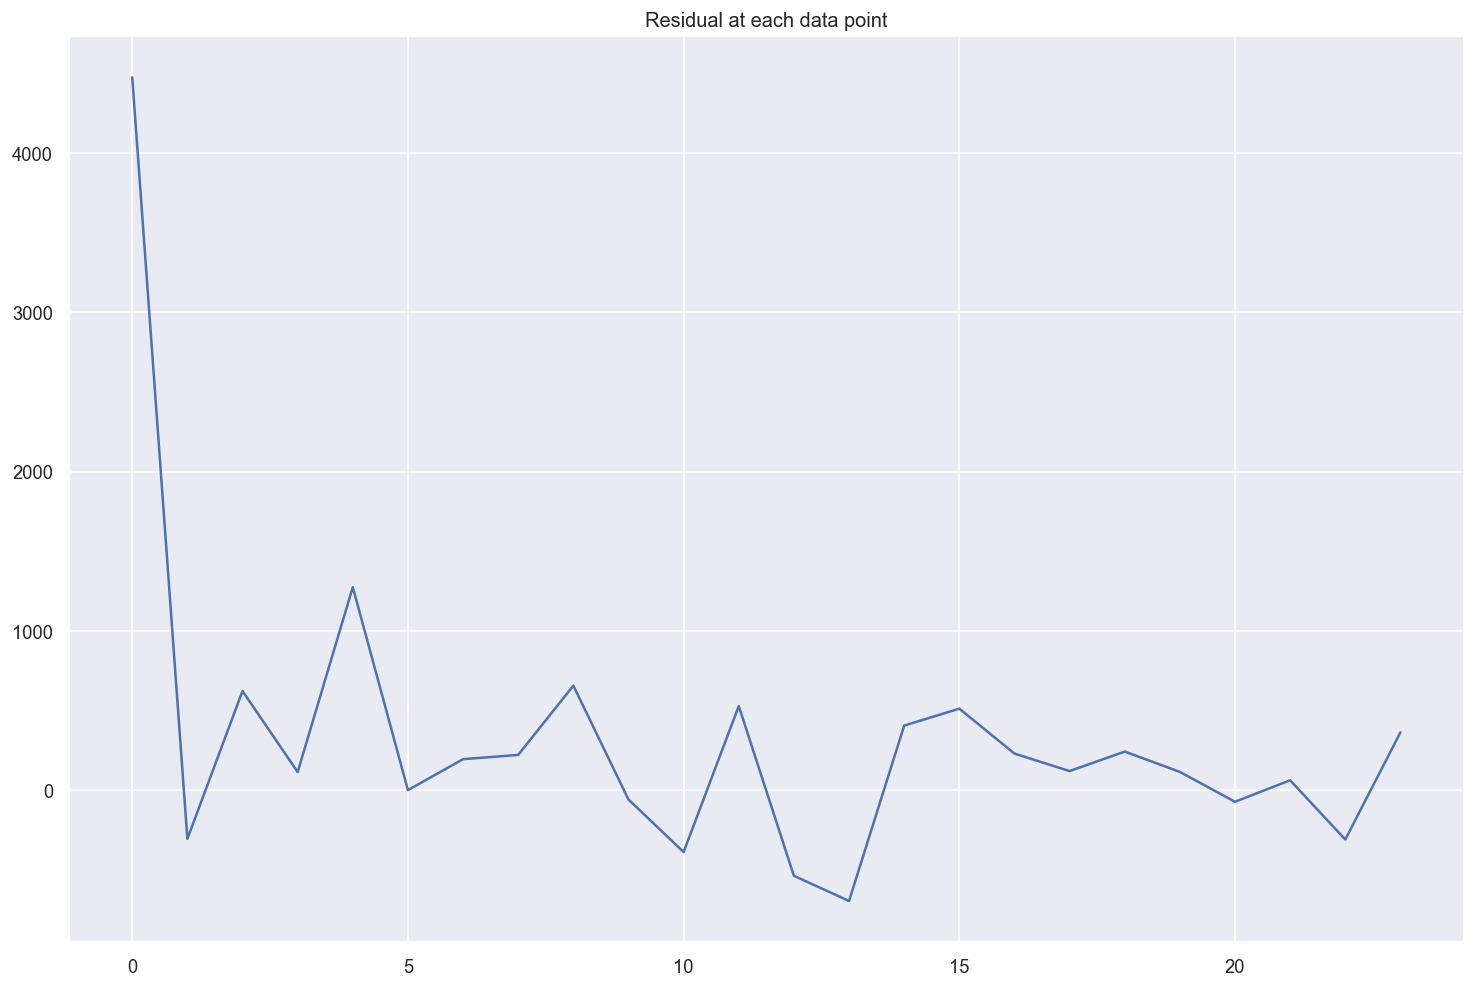

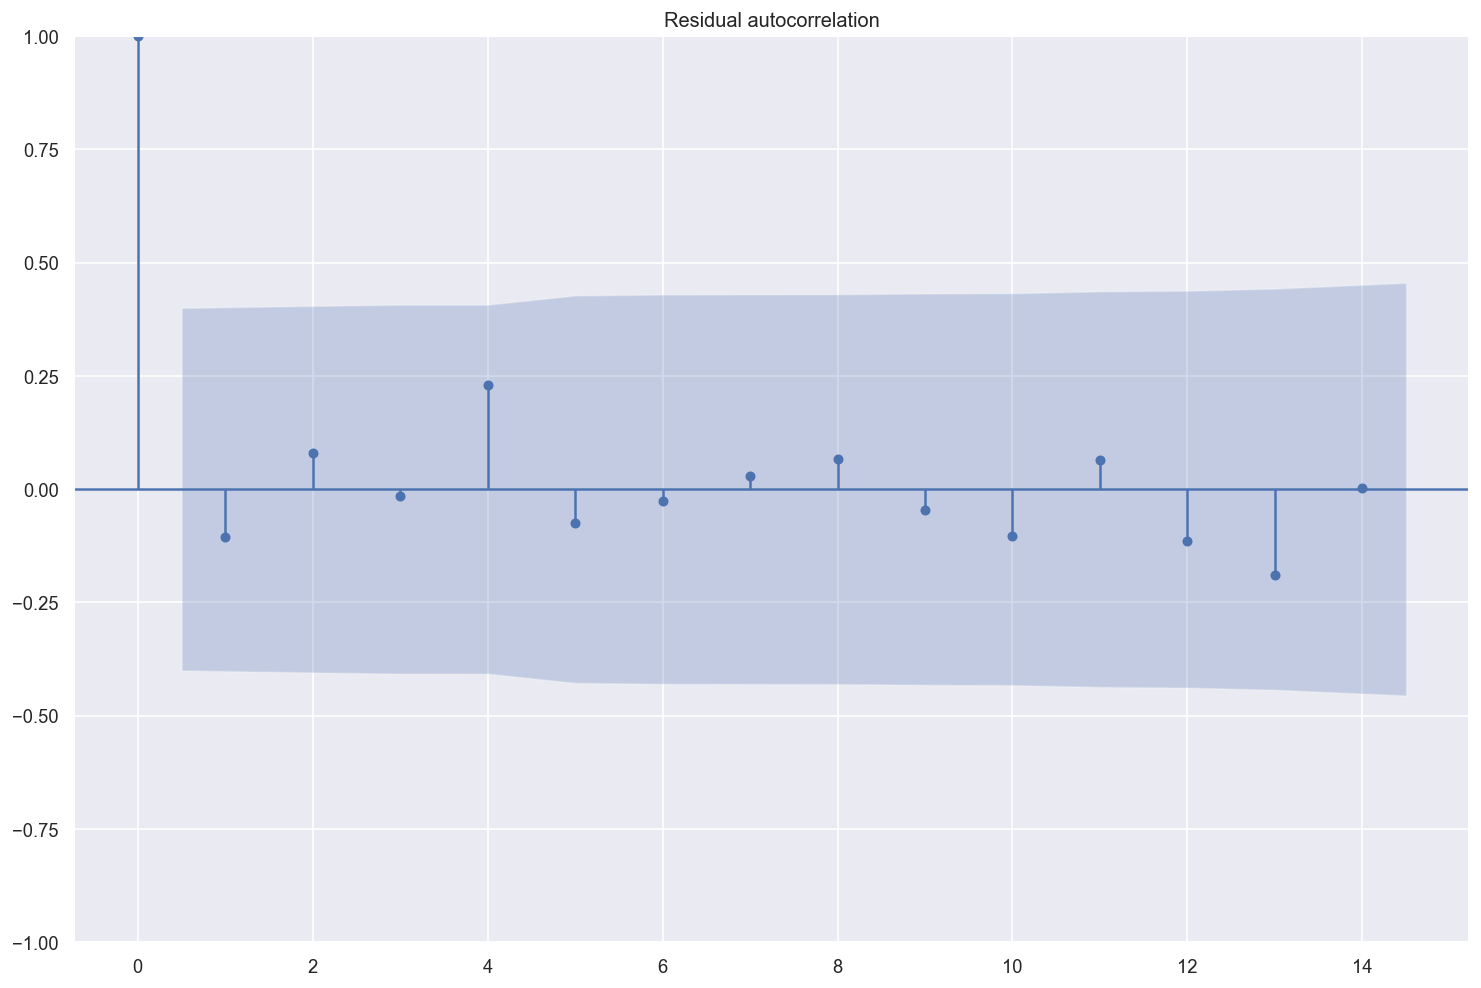

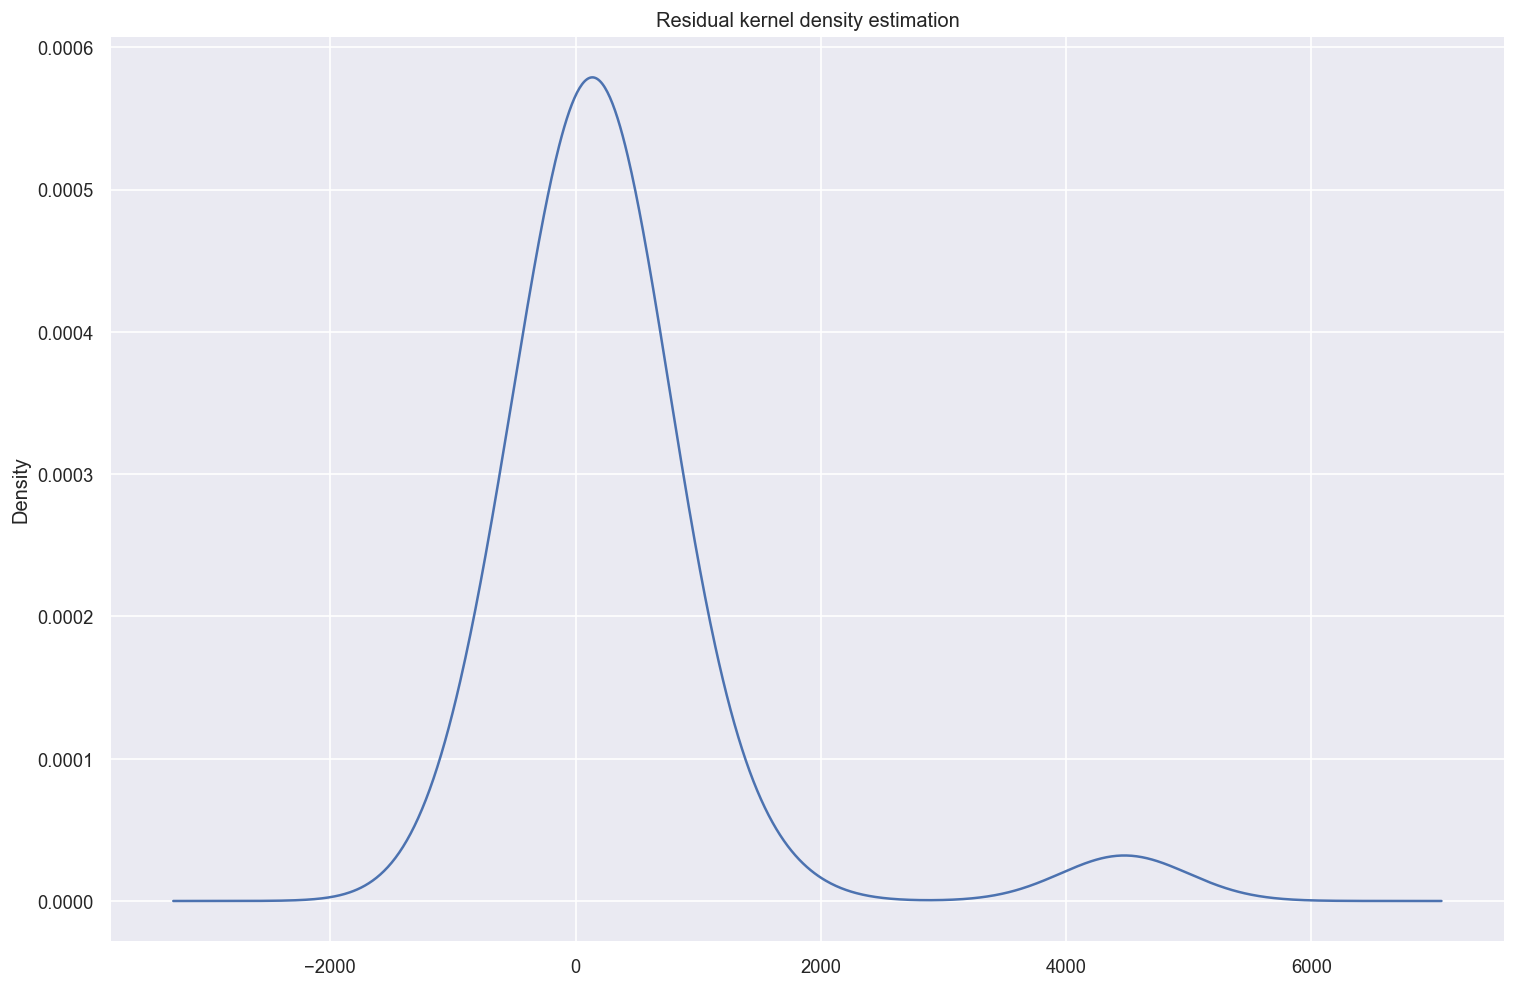

                 0
count    24.000000
mean    323.755884
std     981.448716
min    -695.462376
25%     -62.050942
50%     157.449554
75%     432.133856
max    4475.000000
p value is  2.458592705948913e-10
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.306249   0.579991
2  0.491607   0.782076
3  0.498667   0.919184
4  2.154820   0.707309


In [ ]:
#Build the ARIMA Model, training on the 24-month dataset
P=1
D=1
Q=4

# fit model
N = 24
series = df2_Monthly['persons_injured_or_killed']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [ ]:
X = pd.DataFrame(range(N),columns=['Month'])
X = sm.add_constant(X)
lm=sm.OLS(df2_Monthly['persons_injured_or_killed'][:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                                OLS Regression Results                               
Dep. Variable:     persons_injured_or_killed   R-squared:                       0.060
Model:                                   OLS   Adj. R-squared:                  0.017
Method:                        Least Squares   F-statistic:                     1.407
Date:                       Wed, 20 Apr 2022   Prob (F-statistic):              0.248
Time:                               14:29:49   Log-Likelihood:                -183.88
No. Observations:                         24   AIC:                             371.8
Df Residuals:                             22   BIC:                             374.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

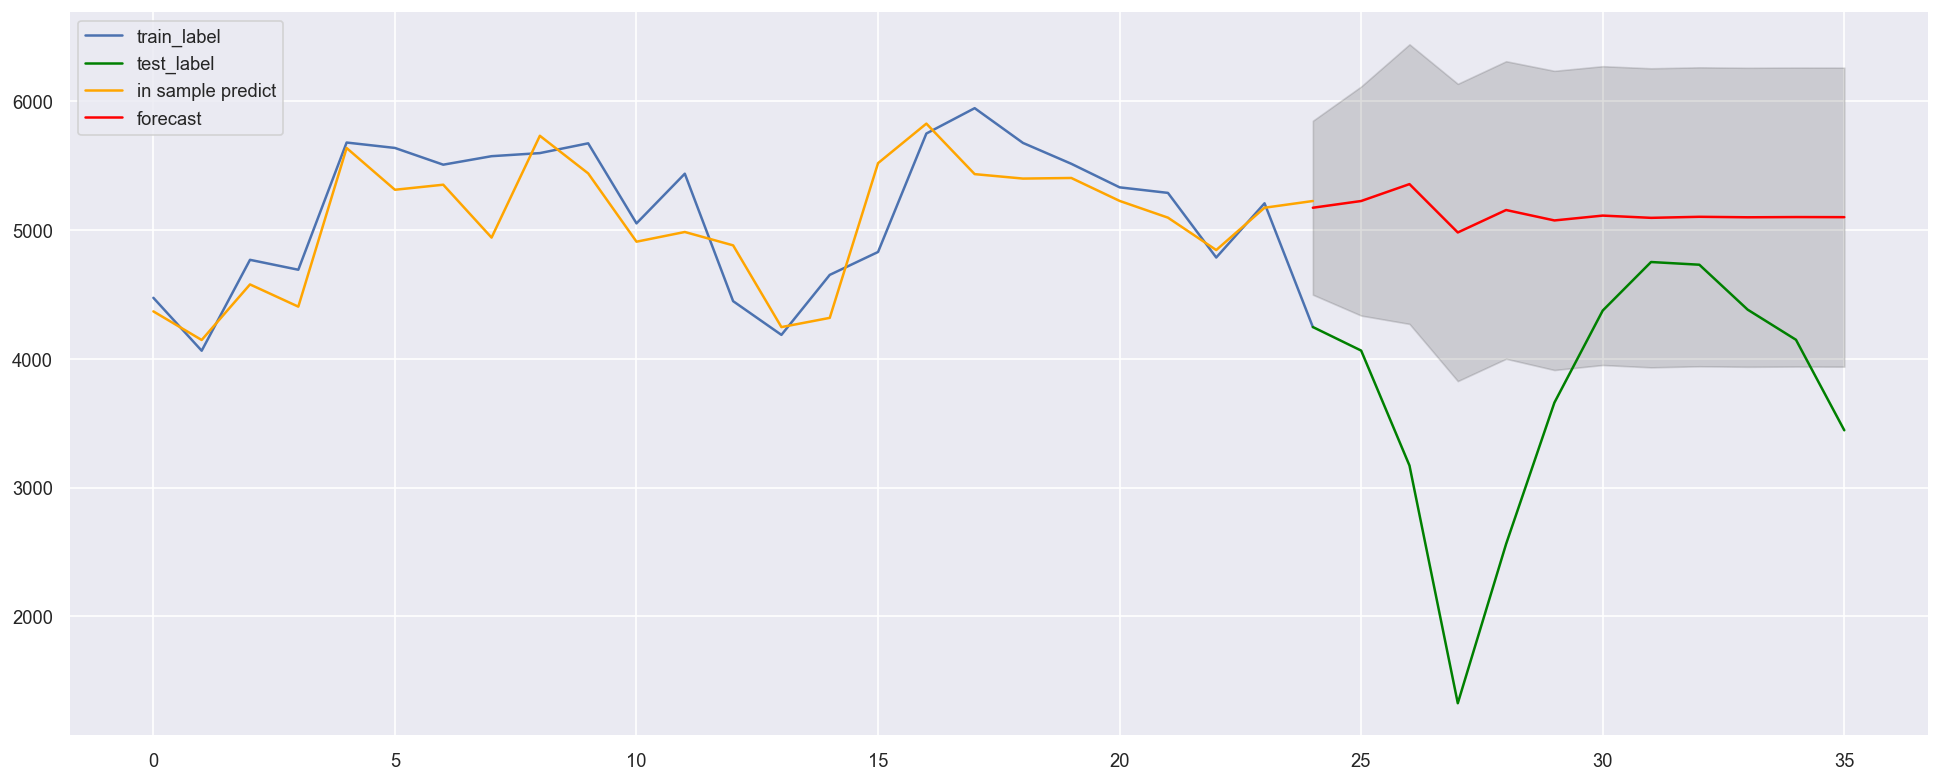

In [ ]:
# Forecast

fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df2_Monthly.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df2_Monthly.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df2_Monthly.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df2_Monthly.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

In [ ]:
X = pd.DataFrame(range(N-1,len(df2_Monthly)),columns=['Month'])
X = sm.add_constant(X)
pred = lm.predict(X)

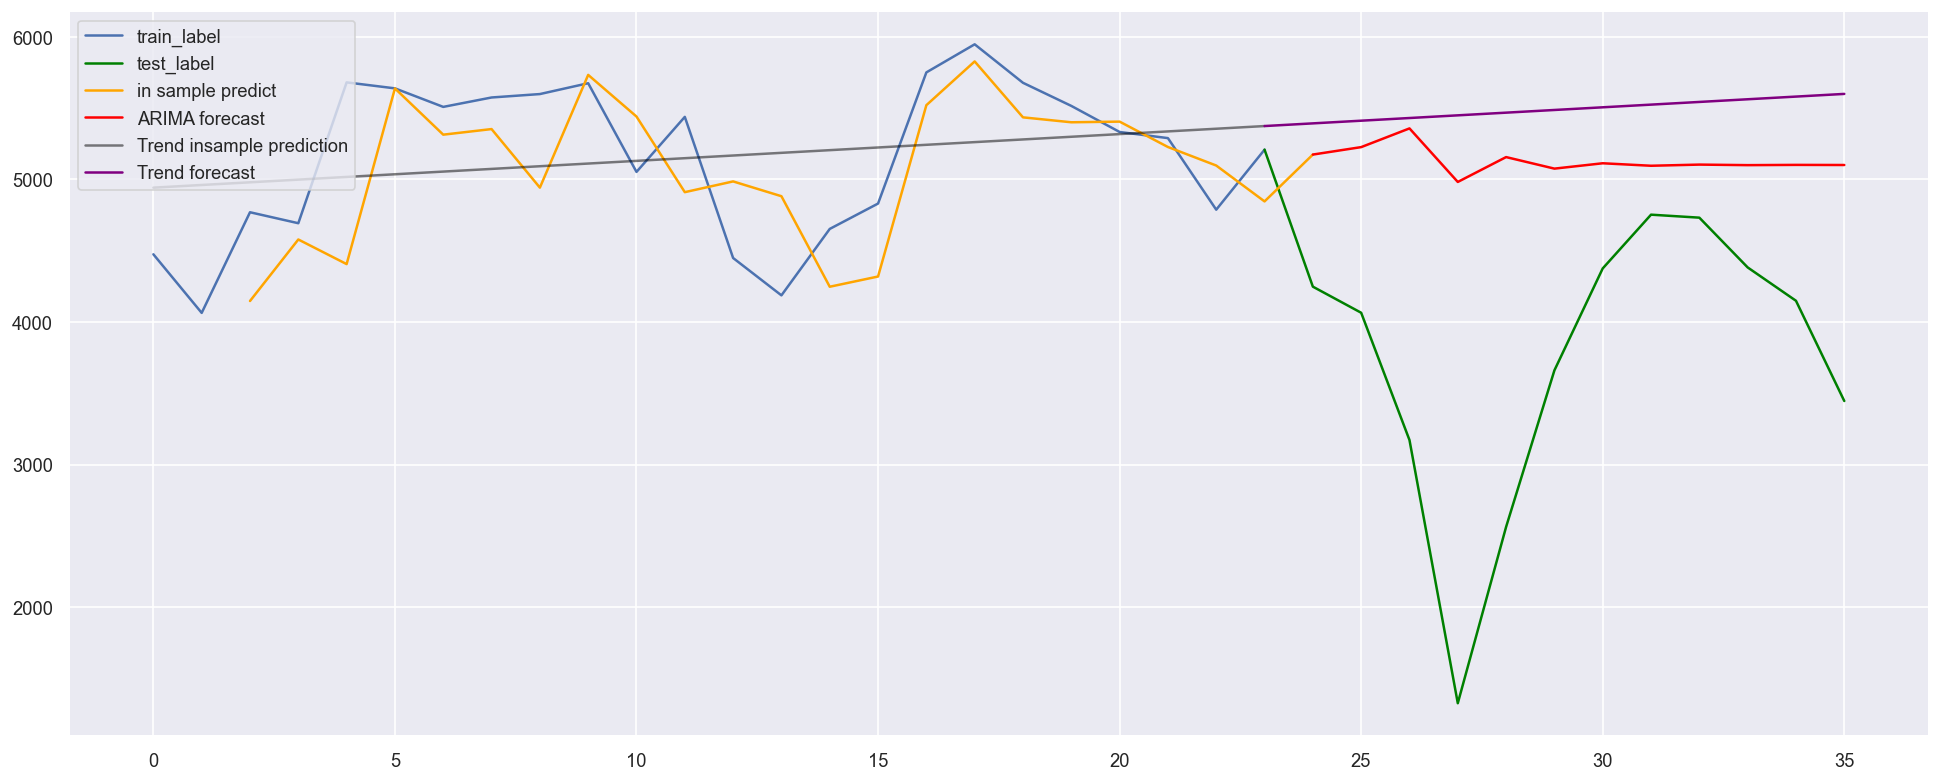

In [ ]:
plt.plot(df2_Monthly['persons_injured_or_killed'][:N],label='train_label')
plt.plot(range(N-1,len(df2_Monthly)),df2_Monthly['persons_injured_or_killed'][N-1:],color='green',label='test_label')
plt.plot(range(P+D,N+1),model_fit.predict(start=P+D,end=N,dynamic=False,typ='levels'),color='orange',label='in sample predict')
plt.plot(fc_series, label='ARIMA forecast', color='red')

plt.plot(insample, label='Trend insample prediction', color='black',alpha=0.5)
plt.plot(range(N-1,len(df2_Monthly['persons_injured_or_killed'])),pred, label='Trend forecast', color='purple')

plt.legend(loc='upper left')

# Zip code for Time-series

#Then we are now choosing Zip_Code = 10000 to analyze the Time-Series

In [ ]:
Zipcode_distribution1 = df_drop_empty_zipcode_2018_2020_1.groupby(['zip_code','Date']).\
            agg({'collision_id':'count','number_of_persons_injured':'sum','number_of_persons_killed':'sum'}).\
            rename(columns={'collision_id':'collision_count'}).reset_index()

In [ ]:
Zipcode_distribution1

,zip_code,Date,collision_count,number_of_persons_injured,number_of_persons_killed
0,10000.0,2018-01-09,1,0.0,0.0
1,10000.0,2018-01-27,1,0.0,0.0
2,10000.0,2018-02-07,1,0.0,0.0
3,10000.0,2018-02-14,1,0.0,0.0
4,10000.0,2018-02-17,1,0.0,0.0
...,...,...,...,...,...
136993,11697.0,2020-10-08,1,1.0,0.0
136994,11697.0,2020-10-17,1,0.0,0.0
136995,11697.0,2020-11-05,1,0.0,0.0
136996,11697.0,2020-11-24,1,0.0,0.0


In [ ]:
Zipcode_distribution1['persons_injured_or_killed'] = Zipcode_distribution1['number_of_persons_injured'] + Zipcode_distribution1['number_of_persons_killed']
#Zipcode_distribution1['Date'] = pd.to_datetime(Zipcode_distribution1['Date']).dt.to_period('M')
df3_Monthly = Zipcode_distribution1.groupby(['zip_code','Date'])[['collision_count','persons_injured_or_killed']].sum().reset_index()
#df2_Monthly.set_index('Date',inplace = True)
df3_Monthly.head(100)

,zip_code,Date,collision_count,persons_injured_or_killed
0,10000.0,2018-01-09,1,0.0
1,10000.0,2018-01-27,1,0.0
2,10000.0,2018-02-07,1,0.0
3,10000.0,2018-02-14,1,0.0
4,10000.0,2018-02-17,1,0.0
...,...,...,...,...
95,10000.0,2019-09-18,1,0.0
96,10000.0,2019-09-19,1,1.0
97,10000.0,2019-10-05,1,1.0
98,10000.0,2019-10-18,1,0.0


In [ ]:
df3_Monthly['Date'] = pd.to_datetime(df3_Monthly['Date']).dt.to_period('M')


In [ ]:
len(df3_Monthly['zip_code'] == 10000)

136998

In [ ]:
df3_Monthly.head()

,zip_code,Date,collision_count,persons_injured_or_killed
0,10000.0,2018-01,1,0.0
1,10000.0,2018-01,1,0.0
2,10000.0,2018-02,1,0.0
3,10000.0,2018-02,1,0.0
4,10000.0,2018-02,1,0.0


In [ ]:
df3_Monthly2 = df3_Monthly.groupby(['zip_code','Date']).\
            agg({'collision_count':'sum','persons_injured_or_killed':'sum'}).reset_index()

In [ ]:
df3_Monthly2

,zip_code,Date,collision_count,persons_injured_or_killed
0,10000.0,2018-01,2,0.0
1,10000.0,2018-02,4,0.0
2,10000.0,2018-03,2,1.0
3,10000.0,2018-04,8,3.0
4,10000.0,2018-05,9,1.0
...,...,...,...,...
6769,11697.0,2020-06,1,0.0
6770,11697.0,2020-08,3,1.0
6771,11697.0,2020-10,3,2.0
6772,11697.0,2020-11,2,0.0


In [ ]:
df3_Monthly_10000 = df3_Monthly2.loc[df3_Monthly2['zip_code']==10000]

In [ ]:
df3_Monthly_10000

,zip_code,Date,collision_count,persons_injured_or_killed
0,10000.0,2018-01,2,0.0
1,10000.0,2018-02,4,0.0
2,10000.0,2018-03,2,1.0
3,10000.0,2018-04,8,3.0
4,10000.0,2018-05,9,1.0
5,10000.0,2018-06,5,4.0
6,10000.0,2018-07,3,2.0
7,10000.0,2018-08,3,0.0
8,10000.0,2018-09,5,1.0
9,10000.0,2018-10,6,2.0


                               SARIMAX Results                                
Dep. Variable:        collision_count   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.576
Date:                Wed, 20 Apr 2022   AIC                            117.151
Time:                        16:12:40   BIC                            120.558
Sample:                             0   HQIC                           118.008
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0661      0.307      0.216      0.829      -0.535       0.667
ma.L1         -0.9999    238.083     -0.004      0.997    -467.633     465.633
sigma2         6.4381   1532.301      0.004      0.9

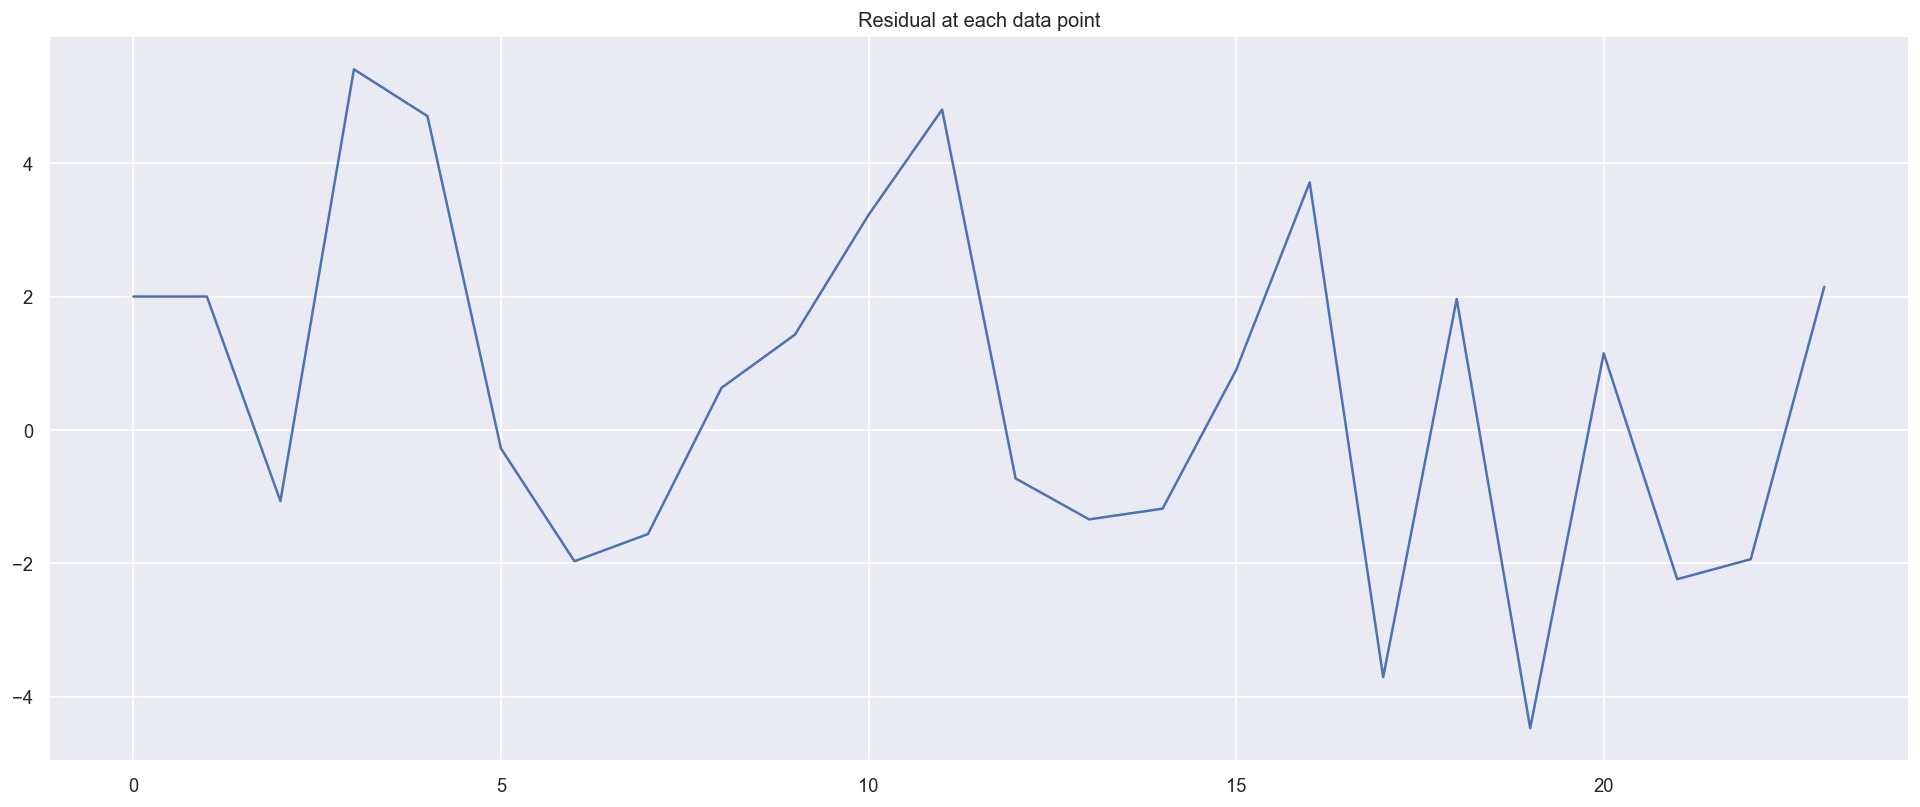

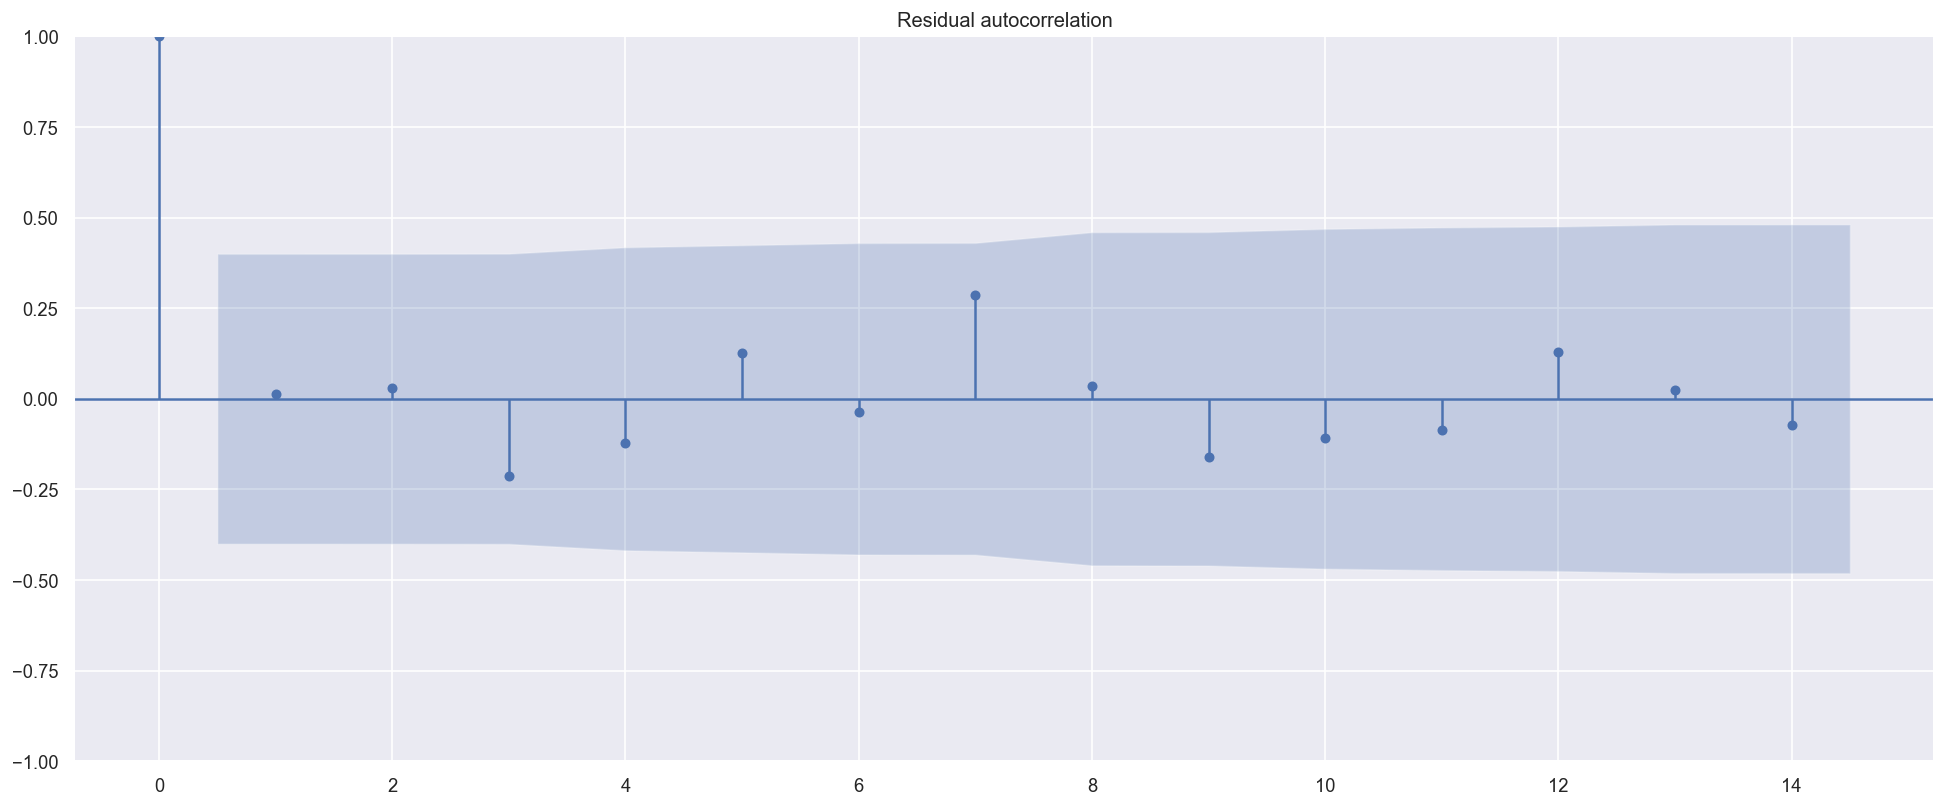

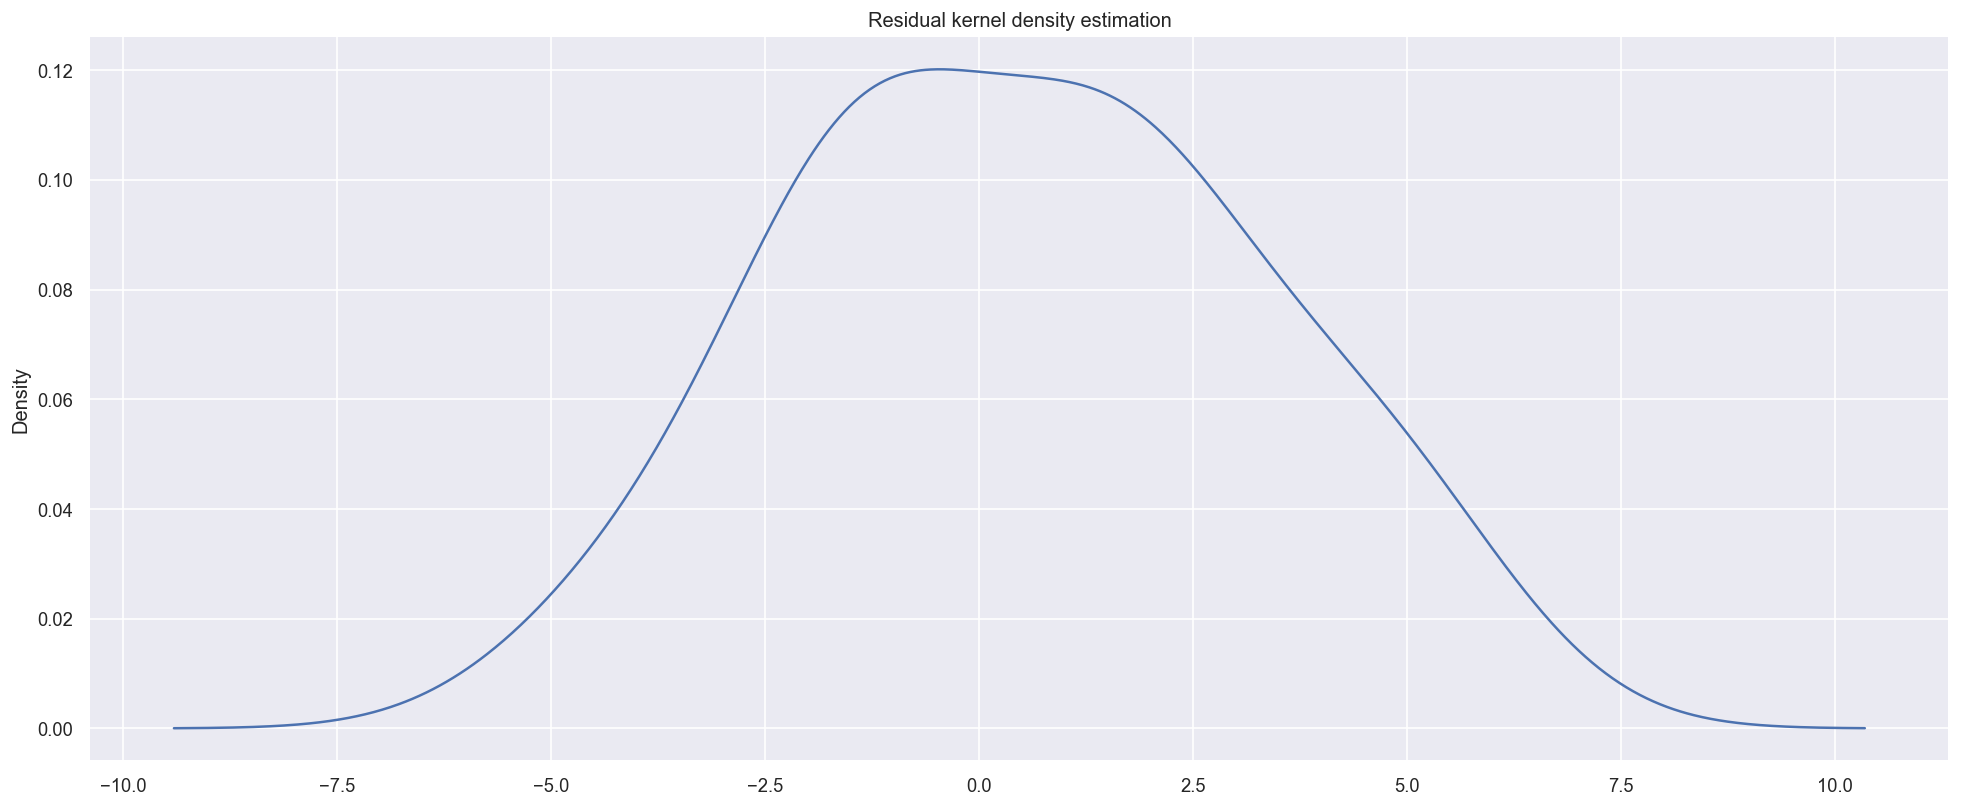

               0
count  24.000000
mean    0.566579
std     2.683087
min    -4.470333
25%    -1.395123
50%     0.765151
75%     2.036652
max     5.405504
p value is  0.7017059999610986
null hypothesis: residuals come from a normal distribution
The null hypothesis cannot be rejected
Ljung–Box:
    lb_stat  lb_pvalue
1  0.004749   0.945060
2  0.031160   0.984541
3  1.375516   0.711284
4  1.843422   0.764529


In [ ]:
#We use the same parameters(P,D,Q) from the previous ARIMA Model, training on the first 24-month dataset
P=1
D=1
Q=1

# fit model
N = 24
series = df3_Monthly_10000['collision_count']
model = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

In [ ]:
X_10000 = pd.DataFrame(range(N),columns=['Month'])
X_10000 = sm.add_constant(X_10000)
lm=sm.OLS(df3_Monthly_10000['collision_count'][:N],X_10000).fit()
insample_10000 = lm.predict(X_10000)
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        collision_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.002071
Date:                Wed, 20 Apr 2022   Prob (F-statistic):              0.964
Time:                        16:12:57   Log-Likelihood:                -55.870
No. Observations:                  24   AIC:                             115.7
Df Residuals:                      22   BIC:                             118.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0433      1.026      4.916      0.0

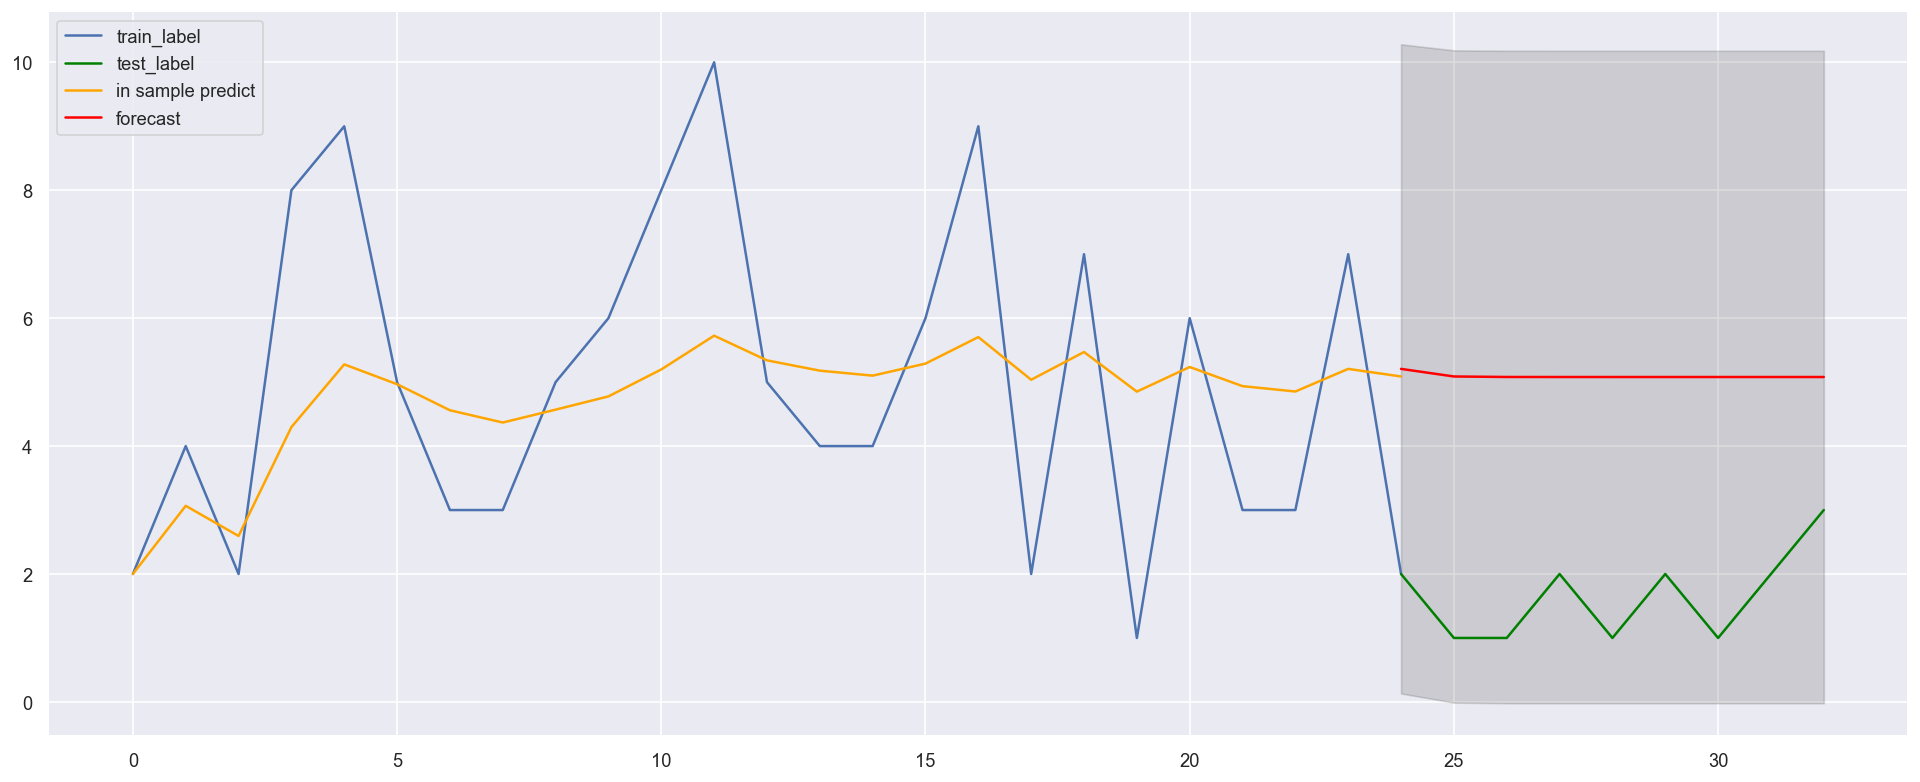

In [ ]:
# Forecast

fcast = model_fit.forecast(steps=len(series)-N, alpha = 0.5)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N, alpha = 0.5).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df3_Monthly_10000.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df3_Monthly_10000.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df3_Monthly_10000.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df3_Monthly_10000.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

In [ ]:
X = pd.DataFrame(range(N-1,len(df3_Monthly_10000)),columns=['Month'])
X = sm.add_constant(X)
pred_10000 = lm.predict(X)

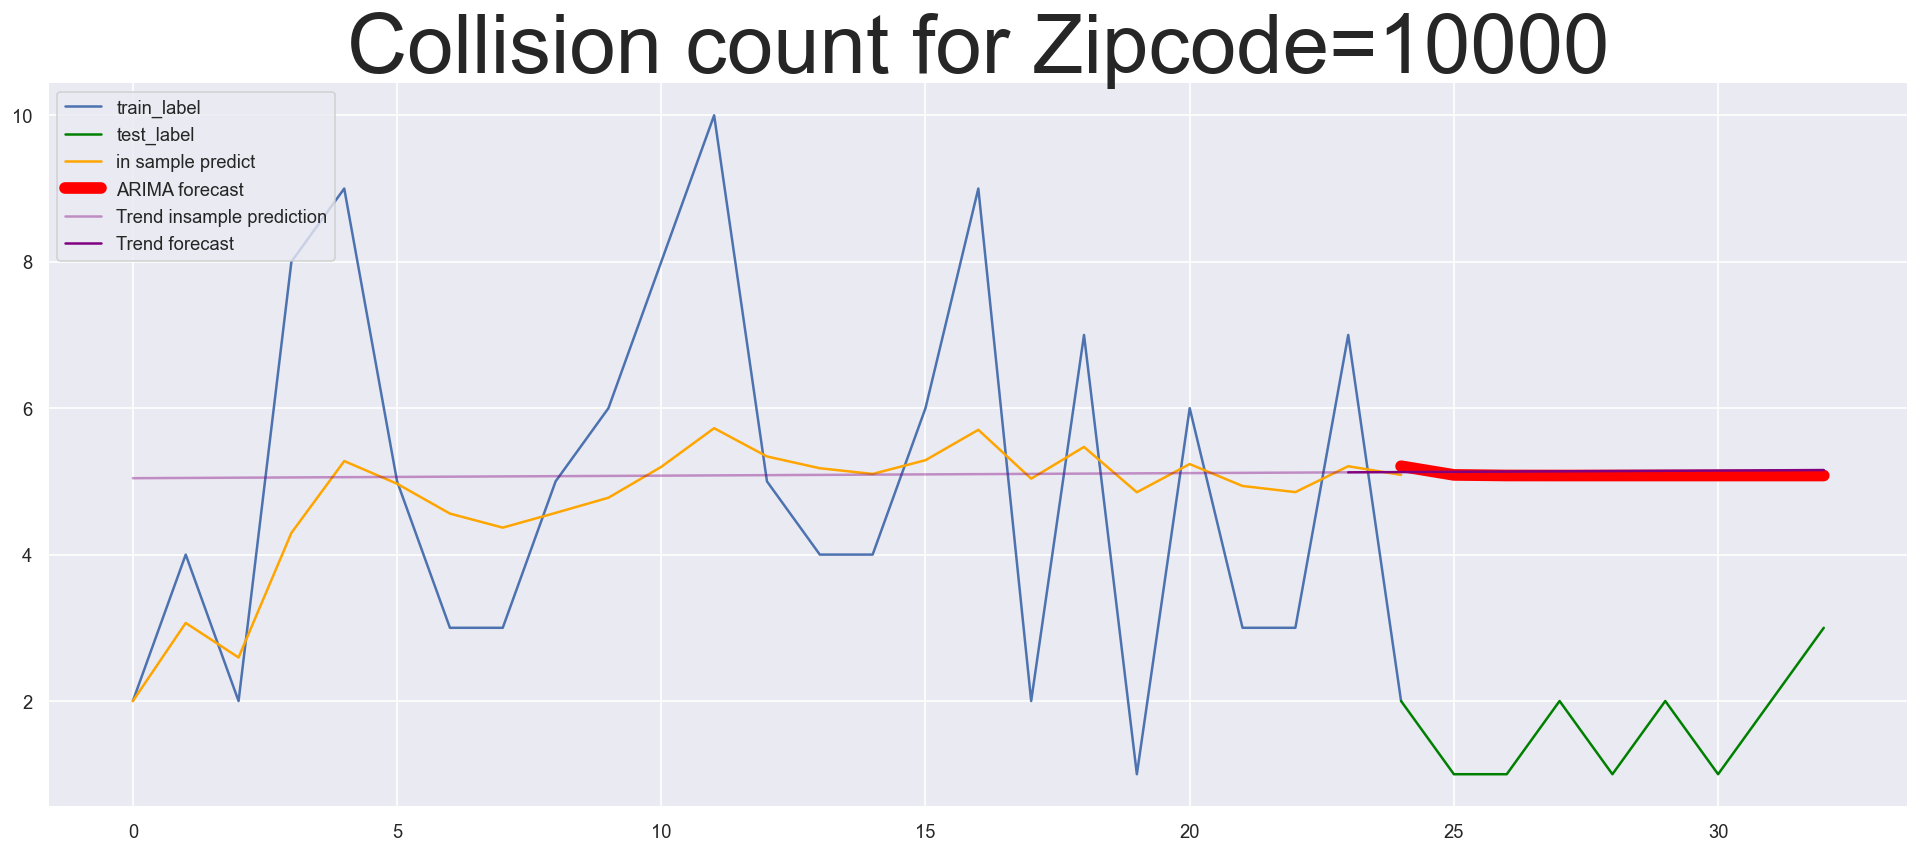

In [ ]:
fig, ax = plt.subplots()
ax.plot(df3_Monthly_10000.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df3_Monthly_10000.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df3_Monthly_10000.iloc[:N+1].index,model_fit.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series, label='ARIMA forecast', color='red',linewidth=7.0)

ax.plot(insample_10000, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df3_Monthly_10000)),pred_10000, label='Trend forecast', color='purple')

plt.title('Collision count for Zipcode=10000', fontsize=50)
plt.legend(loc='upper left')

In [ ]:
#For 

In [ ]:
N1=24 # same number of dataset with previous model
series1 = df3_Monthly_10000['persons_injured_or_killed']
model1 = sm.tsa.arima.ARIMA(series[:N], order=(P,D,Q))
model_fit1 = model.fit()

In [ ]:
X_10000 = pd.DataFrame(range(N),columns=['Month'])
X_10000 = sm.add_constant(X_10000)
lm=sm.OLS(df3_Monthly_10000['persons_injured_or_killed'][:N],X_10000).fit()
insample_10000_1 = lm.predict(X_10000)

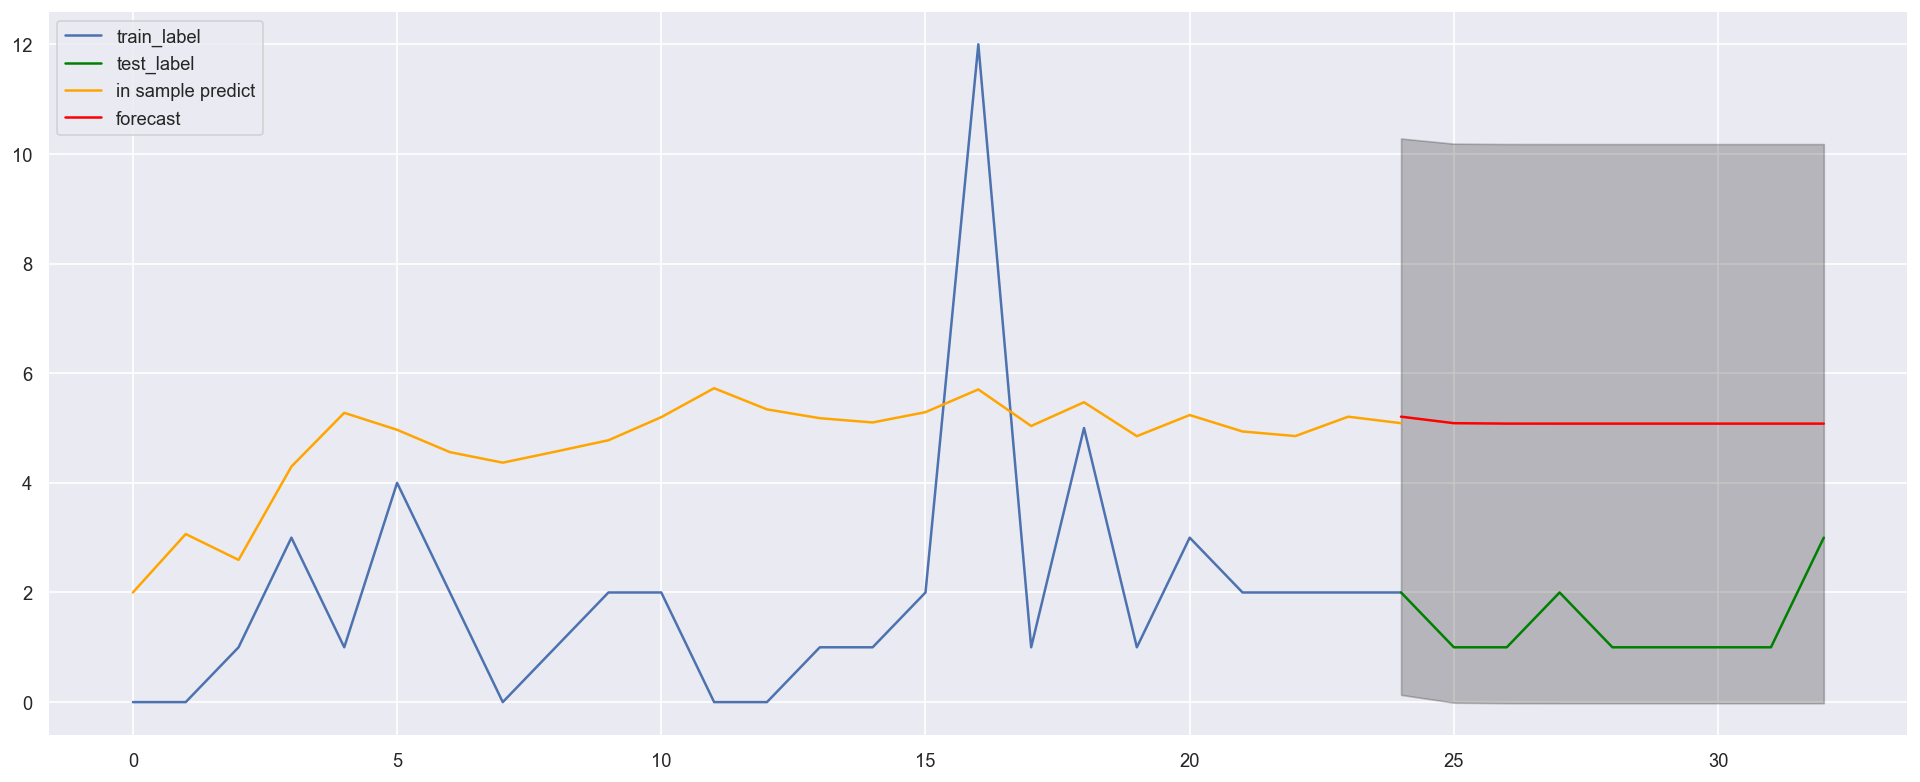

In [ ]:
# Forecast

fcast = model_fit.forecast(steps=len(series1)-N, alpha = 0.5)  # 95% conf
fc1 = model_fit.get_forecast(steps=len(series1)-N, alpha = 0.5).summary_frame()

fc_series1 = pd.Series(fc1['mean'], index=range(N,len(series1)))

lower_series1 = pd.Series(fc1.mean_ci_lower, index=range(N,len(series1)))
upper_series1 = pd.Series(fc1.mean_ci_upper, index=range(N,len(series1)))

plt.rcParams.update({'figure.figsize':(20,8)})
fig, ax = plt.subplots()
ax.plot(df3_Monthly_10000.index[:N+1],series1[:N+1],label='train_label') # train
ax.plot(df3_Monthly_10000.index[N:],series1[N:],color='green',label='test_label') # test
ax.plot(df3_Monthly_10000.iloc[:N+1].index,model_fit1.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series1, label='forecast', color='red') # forecast
ax.fill_between(df3_Monthly_10000.iloc[N:].index, lower_series1, upper_series1, color='k', alpha=.25) # conf
ax.legend(loc='upper left')

In [ ]:
X = pd.DataFrame(range(N-1,len(df3_Monthly_10000)),columns=['Month'])
X = sm.add_constant(X)
pred_10000_1 = lm.predict(X)

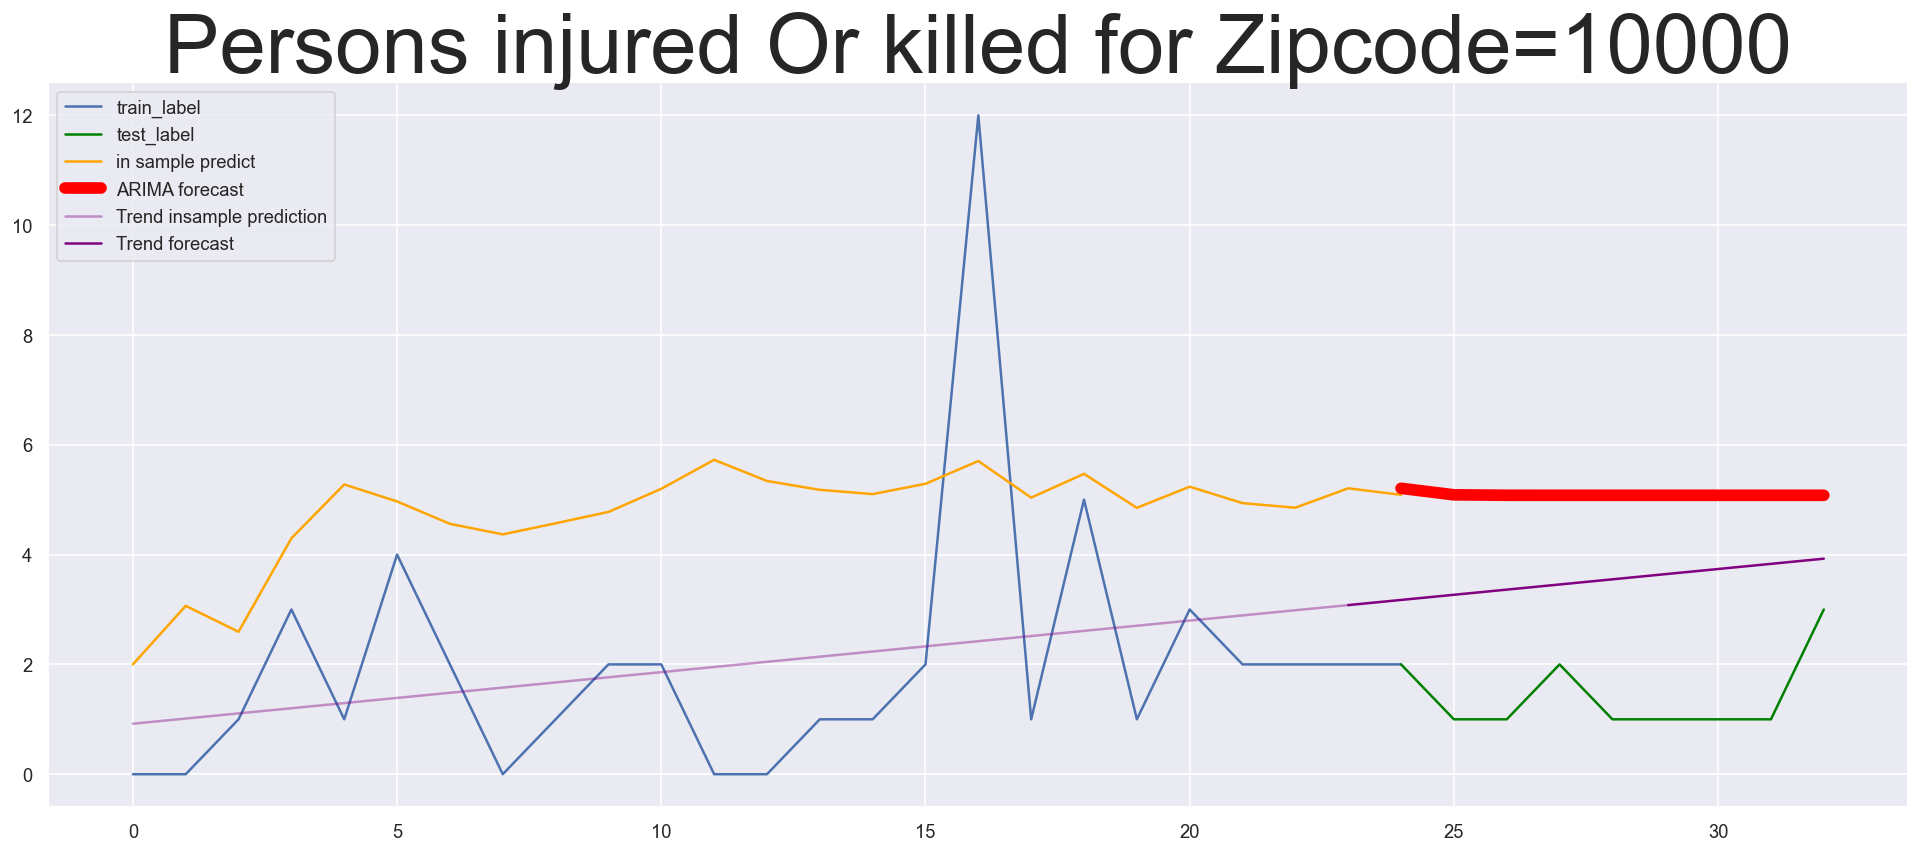

In [ ]:
fig, ax = plt.subplots()
ax.plot(df3_Monthly_10000.index[:N+1],series1[:N+1],label='train_label') # train
ax.plot(df3_Monthly_10000.index[N:],series1[N:],color='green',label='test_label') # test
ax.plot(df3_Monthly_10000.iloc[:N+1].index,model_fit1.predict(start=1,end=N+1,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample

ax.plot(fc_series1, label='ARIMA forecast', color='red',linewidth=7.0)


ax.plot(insample_10000_1, label='Trend insample prediction', color='purple',alpha=0.4)
ax.plot(range(N-1,len(df3_Monthly_10000)),pred_10000_1, label='Trend forecast', color='purple')

plt.title('Persons injured Or killed for Zipcode=10000', fontsize=50)
plt.legend(loc='upper left')